<a href="https://colab.research.google.com/github/gcarmonav/Actividad-7/blob/main/Optimizaci%C3%B3n_y_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 08: optimización y redes neuronales
###Decisiones bajo incertidumbre

Por:

Giovanna Andrea Carmona Valencia cc. 39.193.395

Hilber Garcia López cc. 83.091.440

## 1. Planteamiento

###1.1. Objetivo:
Afianzar los conocimientos de optimización numérica y su importancia en el entrenamiento de modelos de aprendizaje de máquina.

Para ello se considera el tutorial de reconocimiento de dígitos con el conjunto de datos MNIST de la Guia inicial de TensorFlow 2.0 para principiantes.






###1.2. Dataset utilizado

El dataset MNIST es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano, su nombre significa Modified NIST. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Este dataset se encuentra compuesto por una serie de imágenes de dígitos escritos a mano alzada, entre 0 y 9. Cada dígito está representado por una imagen en blanco y negro de 28 x 28 pixeles, estas imágenes fueron tomadas de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. 

Para empezar la actividad, instalamos TensorFlow y las librerías a utilizar

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos y exploramos el dataset con el que se va a trabajar:


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Validamos las dimensiones de los vectores de entrenamiento y prueba:

In [3]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


El conjunto de entrenamiento contiene 60.000 imágenes mientras que el de pruba contiene 10.000. La dimensión de x_train y x_test es de 28 x 28 pixeles, mientas que el y_train y y_test es de dimensión 1 correspondiente a las etiquetas de las imagenes.

A continuación visualizamos algunas imágenes del dataset:

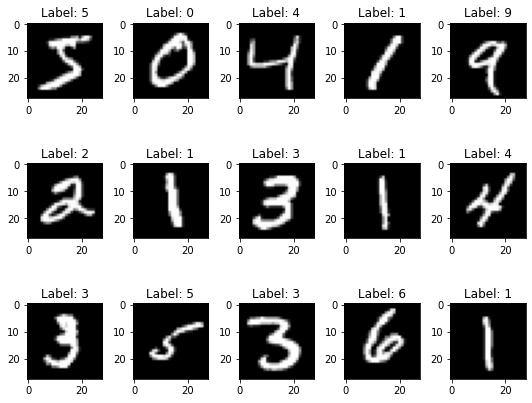

In [4]:
num = 15
images = x_train[:num]
labels = y_train[:num]

num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

##2. Solución

###2.1. Reproduzca el tutorial citado completándolo con la fórmula matemática de la función de pérdida

En el desarrollo de cada optimizador se incluyó la función de pérdida "sparse_categorical_crossentropy" debido a que en el dataset las clases son mutuamente excluyentes 

###2.2. El entrenamiento con un alto volúmen de imágenes tiene a producir buenos resultados independiente del optimizador. Cambie el método de optimización por

- SGD
- RSMprop
- Adagram
- Adadelta

En cada caso varíe la tasa de aprendizaje η=0.001,0.1,0.5,0.9,1.5  manteniendo los otros parámetros del optimizador en sus valores por defecto. Reporte el accuracy en el conjunto de datos en entrenamiento y validaciónn (los 10,000 datos). Reporte las gráficas de la función de pérdida y del accuracy durante el proceso de optimización.

###2.2.1.Descenso de gradiente estocástico - SGD


El SGD se refiere al descenso de gradiente de mini lotes, es decir, un lote de muestras se selecciona al azar y los parámetros se actualizan en función de esto.

Cuando trabaja por lotes o minibach acelera el proceso de entrenamiento de las redes neuronales y no pierde demasiada precisión

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7723 - accuracy: 0.4769 - val_loss: 1.2113 - val_accuracy: 0.7725
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0380 - accuracy: 0.7441 - val_loss: 0.7806 - val_accuracy: 0.8311
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7746 - accuracy: 0.8001 - val_loss: 0.6144 - val_accuracy: 0.8586
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6546 - accuracy: 0.8233 - val_loss: 0.5283 - val_accuracy: 0.8718
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8816
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2892 - accuracy: 0.9153 - val_loss: 0.1764 - val_accuracy: 0.9487
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1704 - accuracy: 0.9504 - val_loss: 0.1184 - val_accuracy: 0.9645
Epoch 3/5
1875/1875 [======================

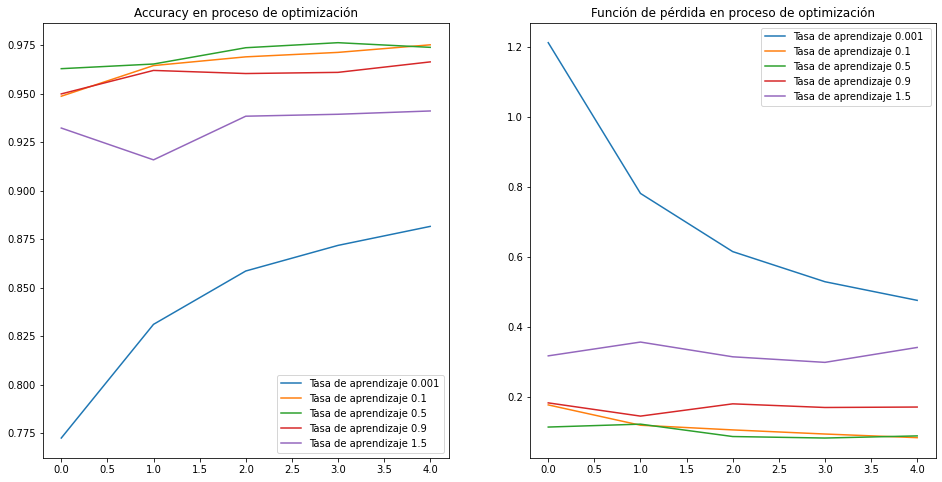

In [5]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.SGD(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyS=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyS.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyS.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.2.1.1. Tasa de aprendizaje 0.001

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7334 - accuracy: 0.4959 - val_loss: 1.1988 - val_accuracy: 0.7748
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0232 - accuracy: 0.7549 - val_loss: 0.7771 - val_accuracy: 0.8380
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7667 - accuracy: 0.8041 - val_loss: 0.6114 - val_accuracy: 0.8613
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6488 - accuracy: 0.8279 - val_loss: 0.5257 - val_accuracy: 0.8762
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.8829


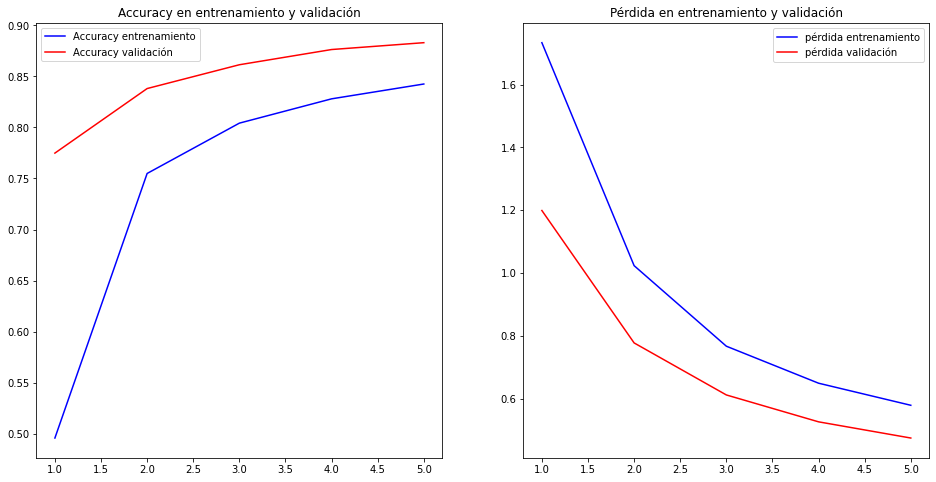

In [6]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS1=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS1.history['loss']
val_loss = historyS1.history['val_loss']
acc = historyS1.history['accuracy']
val_acc = historyS1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [7]:
print('pérdida en entrenamiento ', historyS1.history['loss'][-1])
print('pérdida en  test         ', historyS1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS1.history['accuracy'][-1])
print('accuracy en test         ', historyS1.history['val_accuracy'][-1])

pérdida en entrenamiento  0.5784779191017151
pérdida en  test          0.47415444254875183
accuracy en entrenamiento 0.8424500226974487
accuracy en test          0.8828999996185303


####2.2.1.2. Tasa de aprendizaje 0.1

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3314 - accuracy: 0.9032 - val_loss: 0.1693 - val_accuracy: 0.9494
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1708 - accuracy: 0.9496 - val_loss: 0.1164 - val_accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1321 - accuracy: 0.9604 - val_loss: 0.1015 - val_accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1114 - accuracy: 0.9671 - val_loss: 0.0941 - val_accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0859 - accuracy: 0.9737


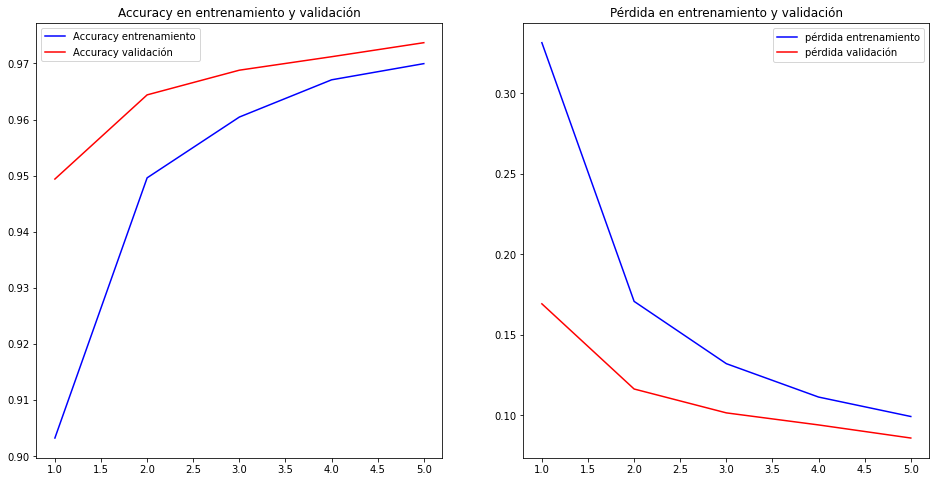

In [8]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS2=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS2.history['loss']
val_loss = historyS2.history['val_loss']
acc = historyS2.history['accuracy']
val_acc = historyS2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [9]:
print('pérdida en entrenamiento ', historyS2.history['loss'][-1])
print('pérdida en  test         ', historyS2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS2.history['accuracy'][-1])
print('accuracy en test         ', historyS2.history['val_accuracy'][-1])

pérdida en entrenamiento  0.0992932990193367
pérdida en  test          0.08591841906309128
accuracy en entrenamiento 0.9699666500091553
accuracy en test          0.9736999869346619


####2.2.1.3. Tasa de aprendizaje 0.5

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.9103 - val_loss: 0.1445 - val_accuracy: 0.9552
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1643 - accuracy: 0.9503 - val_loss: 0.1181 - val_accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1346 - accuracy: 0.9587 - val_loss: 0.1128 - val_accuracy: 0.9687
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1196 - accuracy: 0.9626 - val_loss: 0.1034 - val_accuracy: 0.9686
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9710


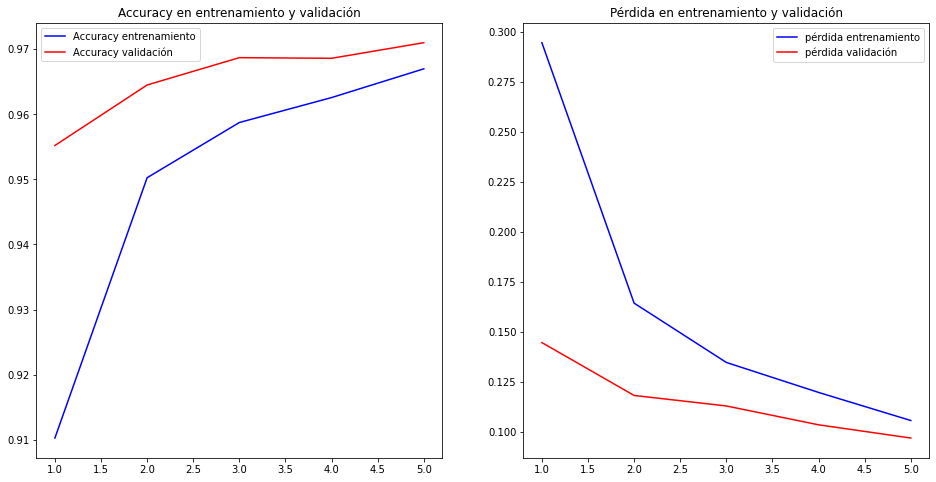

In [10]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS3=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS3.history['loss']
val_loss = historyS3.history['val_loss']
acc = historyS3.history['accuracy']
val_acc = historyS3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [11]:
print('pérdida en entrenamiento ', historyS3.history['loss'][-1])
print('pérdida en  test         ', historyS3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS3.history['accuracy'][-1])
print('accuracy en test         ', historyS3.history['val_accuracy'][-1])

pérdida en entrenamiento  0.10557220876216888
pérdida en  test          0.09681238234043121
accuracy en entrenamiento 0.9669833183288574
accuracy en test          0.9710000157356262


####2.2.1.4. Tasa de aprendizaje 0.9

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5331 - accuracy: 0.8439 - val_loss: 0.2116 - val_accuracy: 0.9415
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3435 - accuracy: 0.9045 - val_loss: 0.1928 - val_accuracy: 0.9437
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2853 - accuracy: 0.9201 - val_loss: 0.2050 - val_accuracy: 0.9465
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2741 - accuracy: 0.9255 - val_loss: 0.2023 - val_accuracy: 0.9468
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.2181 - accuracy: 0.9504


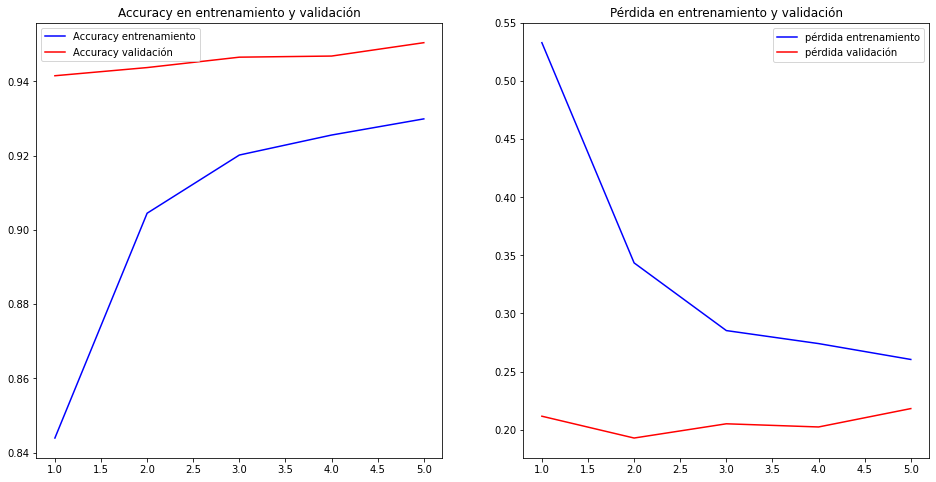

In [12]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS4=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS4.history['loss']
val_loss = historyS4.history['val_loss']
acc = historyS4.history['accuracy']
val_acc = historyS4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [13]:
print('pérdida en entrenamiento ', historyS4.history['loss'][-1])
print('pérdida en  test         ', historyS4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS4.history['accuracy'][-1])
print('accuracy en test         ', historyS4.history['val_accuracy'][-1])

pérdida en entrenamiento  0.2604062557220459
pérdida en  test          0.21812202036380768
accuracy en entrenamiento 0.9298833608627319
accuracy en test          0.9503999948501587


####2.2.1.5. Tasa de aprendizaje 1.5

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0111 - accuracy: 0.2273 - val_loss: 1.9900 - val_accuracy: 0.2111
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0357 - accuracy: 0.2002 - val_loss: 1.9903 - val_accuracy: 0.2106
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0336 - accuracy: 0.2011 - val_loss: 2.0009 - val_accuracy: 0.2129
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9862 - accuracy: 0.2195 - val_loss: 1.9266 - val_accuracy: 0.2436
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.5732 - accuracy: 0.3748


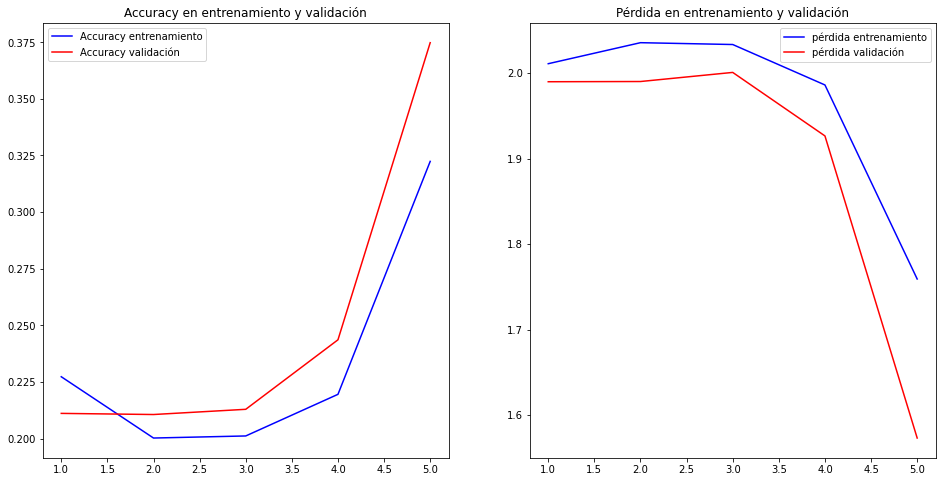

In [14]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS5=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS5.history['loss']
val_loss = historyS5.history['val_loss']
acc = historyS5.history['accuracy']
val_acc = historyS5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [15]:
print('pérdida en entrenamiento ', historyS5.history['loss'][-1])
print('pérdida en validación    ', historyS5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS5.history['accuracy'][-1])
print('accuracy en validación   ', historyS5.history['val_accuracy'][-1])

pérdida en entrenamiento  1.7592670917510986
pérdida en validación     1.5732203722000122
accuracy en entrenamiento 0.3223833441734314
accuracy en validación    0.3747999966144562


Al tomar en cuenta los resultados del accuracy obtenido en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar, seguido de una tasa de aprendizaje con 0.5. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

###2.2.2. RMSprop

Este optimizador es similar al de descenso de gradiente con momentum. este restrige las oscilaciones en la dirección vertical. Por lo tanto, al aumentar la tasa de aprendizaje y el algoritmo podría dar pasos más grandes en la dirección horizontal convergiendo más rápido. La diferencia entre RMSprop y el descenso de gradientes radica en cómo se calculan los gradientes, pues para evitar que estos exploten, se incluye un parámetro épsilon se establece en un valor pequeño.

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2926 - accuracy: 0.9136 - val_loss: 0.1459 - val_accuracy: 0.9551
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1533 - accuracy: 0.9555 - val_loss: 0.1220 - val_accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1235 - accuracy: 0.9657 - val_loss: 0.1029 - val_accuracy: 0.9713
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9695 - val_loss: 0.1028 - val_accuracy: 0.9722
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1047 - accuracy: 0.9743
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1987 - accuracy: 0.6848 - val_loss: 1.1676 - val_accuracy: 0.7400
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6598 - accuracy: 0.6832 - val_loss: 1.4144 - val_accuracy: 0.7406
Epoch 3/5
1875/1875 [======================

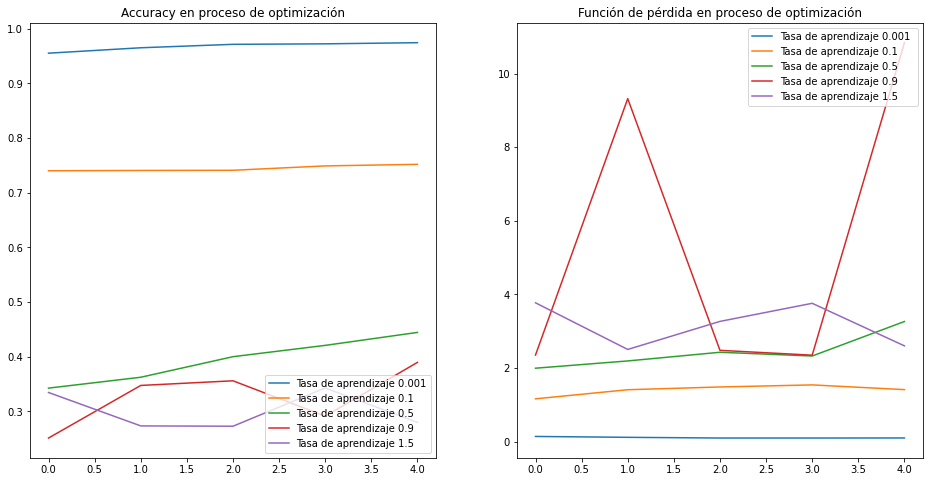

In [16]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.RMSprop(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyR=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')


De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.2.2.1. Tasa de aprendizaje 0.001

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2912 - accuracy: 0.9160 - val_loss: 0.1539 - val_accuracy: 0.9531
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1559 - accuracy: 0.9549 - val_loss: 0.1158 - val_accuracy: 0.9670
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1267 - accuracy: 0.9639 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1123 - accuracy: 0.9691 - val_loss: 0.0999 - val_accuracy: 0.9730
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0958 - accuracy: 0.9754


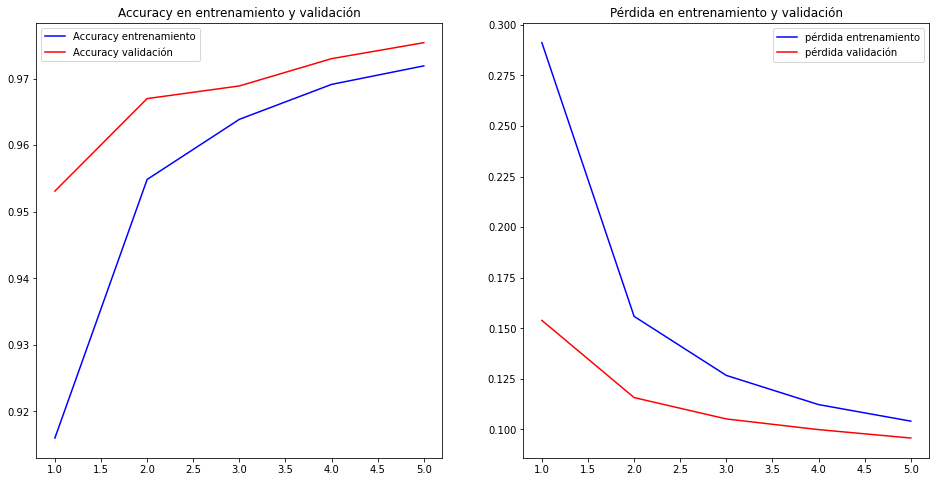

In [17]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR1=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR1.history['loss']
val_loss = historyR1.history['val_loss']
acc = historyR1.history['accuracy']
val_acc = historyR1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [18]:
print('pérdida en entrenamiento ', historyR1.history['loss'][-1])
print('pérdida en validación    ', historyR1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR1.history['accuracy'][-1])
print('accuracy en validación   ', historyR1.history['val_accuracy'][-1])

pérdida en entrenamiento  0.10412077605724335
pérdida en validación     0.09577641636133194
accuracy en entrenamiento 0.971916675567627
accuracy en validación    0.9753999710083008


####2.2.2.2. Tasa de aprendizaje 0.1

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0184 - accuracy: 0.6180 - val_loss: 1.3989 - val_accuracy: 0.7003
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6111 - accuracy: 0.6627 - val_loss: 1.8215 - val_accuracy: 0.6919
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6898 - accuracy: 0.6695 - val_loss: 1.8237 - val_accuracy: 0.7399
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7268 - accuracy: 0.6807 - val_loss: 1.3575 - val_accuracy: 0.7309
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.6330 - accuracy: 0.7745


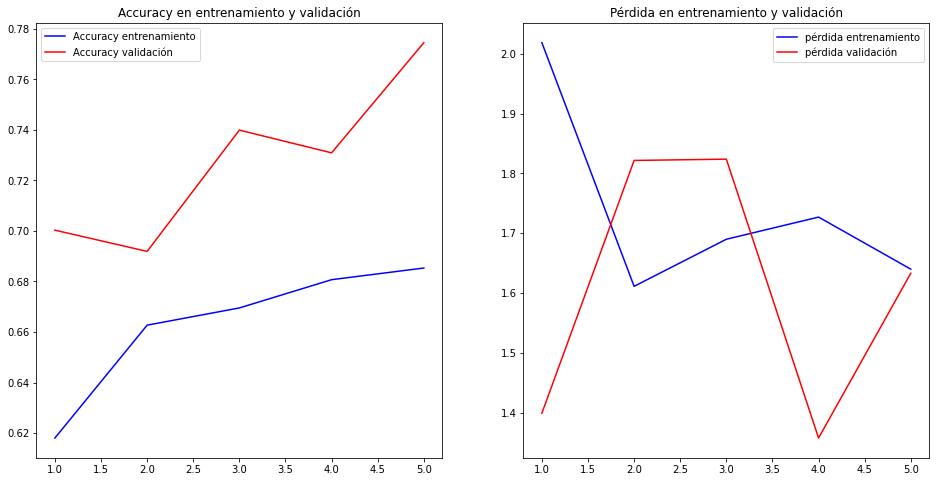

In [19]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR2=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR2.history['loss']
val_loss = historyR2.history['val_loss']
acc = historyR2.history['accuracy']
val_acc = historyR2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [20]:
print('pérdida en entrenamiento ', historyR2.history['loss'][-1])
print('pérdida en validación    ', historyR2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR2.history['accuracy'][-1])
print('accuracy en validación   ', historyR2.history['val_accuracy'][-1])

pérdida en entrenamiento  1.6397686004638672
pérdida en validación     1.6330069303512573
accuracy en entrenamiento 0.6853166818618774
accuracy en validación    0.7745000123977661


####2.2.2.3. Tasa de aprendizaje 0.5

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 10.2054 - accuracy: 0.1429 - val_loss: 2.2646 - val_accuracy: 0.1633
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5861 - accuracy: 0.1768 - val_loss: 2.3089 - val_accuracy: 0.1848
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7145 - accuracy: 0.2069 - val_loss: 4.1494 - val_accuracy: 0.2676
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5091 - accuracy: 0.2377 - val_loss: 2.2490 - val_accuracy: 0.2790
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 2.3078 - accuracy: 0.2824


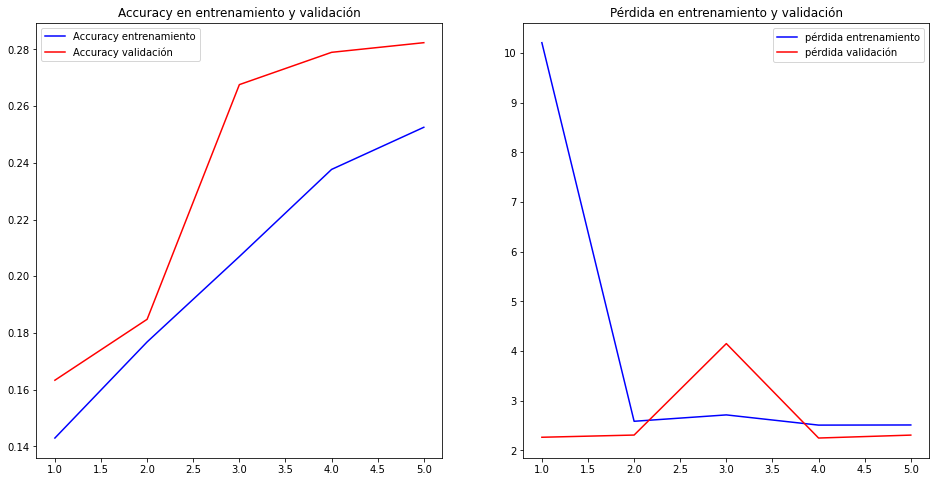

In [21]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR3=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR3.history['loss']
val_loss = historyR3.history['val_loss']
acc = historyR3.history['accuracy']
val_acc = historyR3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [22]:
print('pérdida en entrenamiento ', historyR3.history['loss'][-1])
print('pérdida en validación    ', historyR3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR3.history['accuracy'][-1])
print('accuracy en validación   ', historyR3.history['val_accuracy'][-1])

pérdida en entrenamiento  2.5118203163146973
pérdida en validación     2.307821273803711
accuracy en entrenamiento 0.25255000591278076
accuracy en validación    0.2824000120162964


####2.2.2.4. Tasa de aprendizaje 0.9

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 32.1597 - accuracy: 0.1630 - val_loss: 2.6096 - val_accuracy: 0.1883
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9469 - accuracy: 0.1618 - val_loss: 3.5597 - val_accuracy: 0.2683
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6481 - accuracy: 0.1852 - val_loss: 2.2941 - val_accuracy: 0.1725
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6069 - accuracy: 0.1841 - val_loss: 2.1507 - val_accuracy: 0.1949
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 2.2511 - accuracy: 0.2282


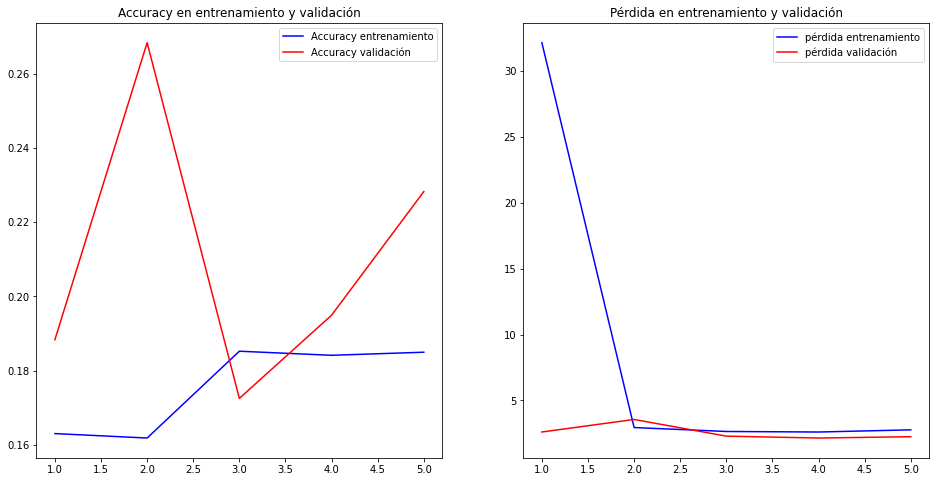

In [23]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR4=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR4.history['loss']
val_loss = historyR4.history['val_loss']
acc = historyR4.history['accuracy']
val_acc = historyR4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [24]:
print('pérdida en entrenamiento ', historyR4.history['loss'][-1])
print('pérdida en validación    ', historyR4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR4.history['accuracy'][-1])
print('accuracy en validación   ', historyR4.history['val_accuracy'][-1])

pérdida en entrenamiento  2.7722017765045166
pérdida en validación     2.251054525375366
accuracy en entrenamiento 0.18493333458900452
accuracy en validación    0.2282000035047531


####2.2.2.5. Tasa de aprendizaje 1.5

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 88.0845 - accuracy: 0.1505 - val_loss: 3.7700 - val_accuracy: 0.1841
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7399 - accuracy: 0.1429 - val_loss: 2.5814 - val_accuracy: 0.1498
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9267 - accuracy: 0.1388 - val_loss: 2.7376 - val_accuracy: 0.1305
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9239 - accuracy: 0.1367 - val_loss: 2.4814 - val_accuracy: 0.1717
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 2.2387 - accuracy: 0.1637


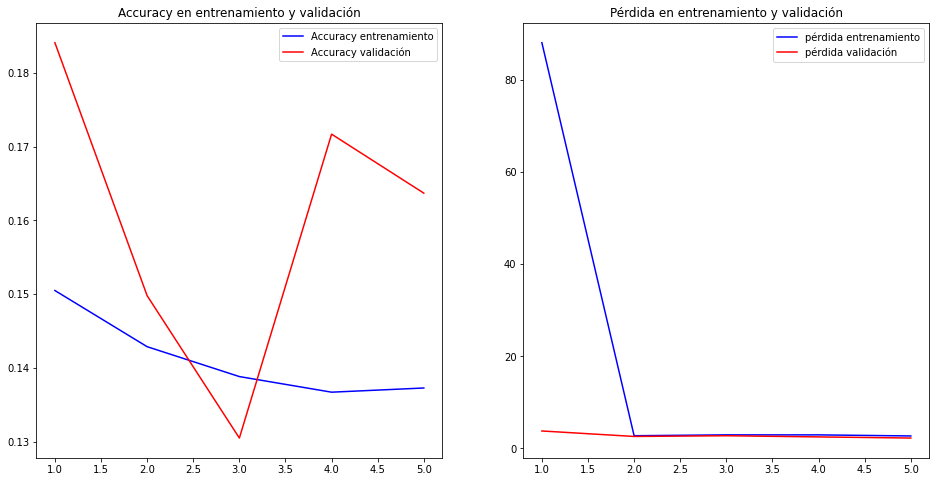

In [25]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyR5=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR5.history['loss']
val_loss = historyR5.history['val_loss']
acc = historyR5.history['accuracy']
val_acc = historyR5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [26]:
print('pérdida en entrenamiento ', historyR5.history['loss'][-1])
print('pérdida en validación    ', historyR5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR5.history['accuracy'][-1])
print('accuracy en validación   ', historyR5.history['val_accuracy'][-1])

pérdida en entrenamiento  2.6907899379730225
pérdida en validación     2.2387406826019287
accuracy en entrenamiento 0.1372833400964737
accuracy en validación    0.16369999945163727


Al tomar en cuenta los resultados del accuracy obtenido en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar, seguido de una tasa de aprendizaje con 0.5. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

###2.2.3.AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo):

Este optimizador es una modificación del descenso de gradiente estocástico SGD, en este se utilizan diferentes tasas de aprendizaje para las variables teniendo en cuenta gradiente acumulado en cada una de ellas. 

Con este optimizador se puede lograr un cambio automático de tasa de aprendizaje. Si el gradiente es grande la tasa de aprendizaje decae rápidamente, lo que puede llevar a no aproximarse al mínimo, mientras que si el gradiente es pequeño la tasa de aprendizaje disminuye más lentamente.Para cada parámetro, a medida que aumenta la distancia de actualización total, su velocidad de aprendizaje también disminuye.

Este puede funcionar bien en algoritmos comunes.Pero en el aprendizaje profundo, cuando la profundidad es demasiado profunda, el entrenamiento terminará temprano.

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2337 - accuracy: 0.6757 - val_loss: 0.7289 - val_accuracy: 0.8425
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6939 - accuracy: 0.8190 - val_loss: 0.5415 - val_accuracy: 0.8737
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5762 - accuracy: 0.8439 - val_loss: 0.4681 - val_accuracy: 0.8860
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5193 - accuracy: 0.8565 - val_loss: 0.4271 - val_accuracy: 0.8937
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8972
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2332 - accuracy: 0.9300 - val_loss: 0.1110 - val_accuracy: 0.9671
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1273 - accuracy: 0.9622 - val_loss: 0.0941 - val_accuracy: 0.9711
Epoch 3/5
1875/1875 [======================

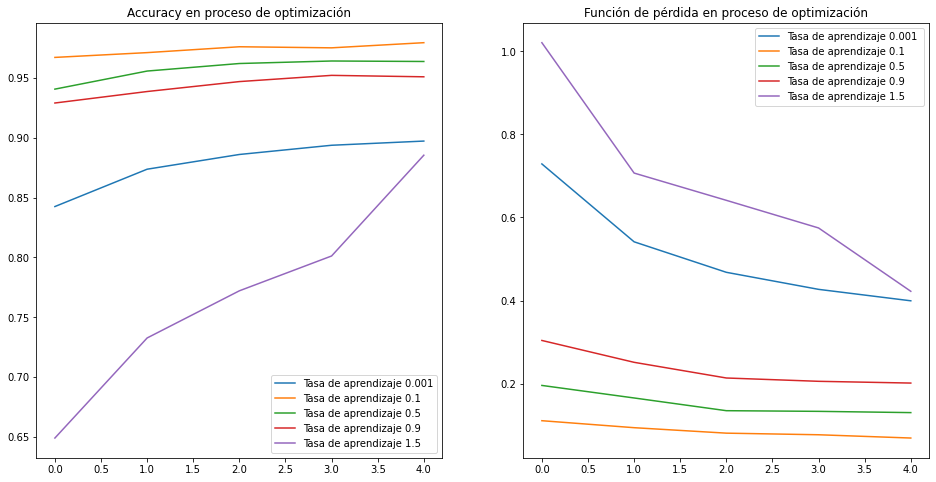

In [27]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adagrad(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyA=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyA.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyA.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados se observa un mejor accuracy y por lo tanto, función de pérdida con una tasa de aprendizaje de 0.1. Mientras que los peores comportamientos respecto al accuracy de evaluación se obtuvieron con una tasa de aprendizaje 0.001 y 1.5, correspondientes al menor y mayor valor, lo cual se debe a que cuando se utiliza una tasa de aprendizaje menor el aprendizaje lleva más tiempo mientrás que con un valor mayor el punto rebotará al azar eternamente en la parte inferior con lo cual se excederá el valor mínimo.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.2.3.1. Tasa de aprendizaje 0.001

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3077 - accuracy: 0.6544 - val_loss: 0.7811 - val_accuracy: 0.8259
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7271 - accuracy: 0.8123 - val_loss: 0.5632 - val_accuracy: 0.8662
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5922 - accuracy: 0.8422 - val_loss: 0.4799 - val_accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5283 - accuracy: 0.8564 - val_loss: 0.4344 - val_accuracy: 0.8914
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8970


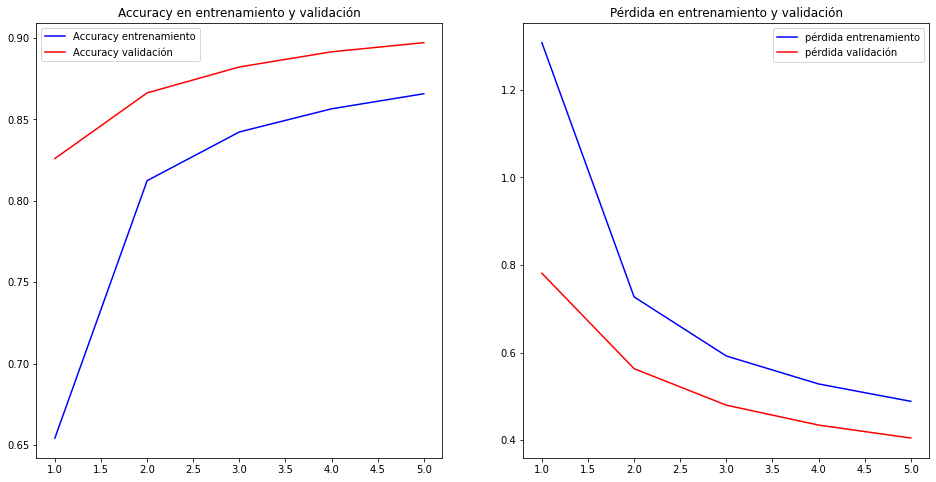

In [28]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA1=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA1.history['loss']
val_loss = historyA1.history['val_loss']
acc = historyA1.history['accuracy']
val_acc = historyA1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [29]:
print('pérdida en entrenamiento ', historyA1.history['loss'][-1])
print('pérdida en  test         ', historyA1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA1.history['accuracy'][-1])
print('accuracy en test         ', historyA1.history['val_accuracy'][-1])

pérdida en entrenamiento  0.48865145444869995
pérdida en  test          0.40483248233795166
accuracy en entrenamiento 0.8656666874885559
accuracy en test          0.8970000147819519


####2.2.3.2. Tasa de aprendizaje 0.1

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9219 - val_loss: 0.1152 - val_accuracy: 0.9635
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1322 - accuracy: 0.9600 - val_loss: 0.0921 - val_accuracy: 0.9730
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1021 - accuracy: 0.9692 - val_loss: 0.0781 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9736 - val_loss: 0.0735 - val_accuracy: 0.9777
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0692 - accuracy: 0.9780


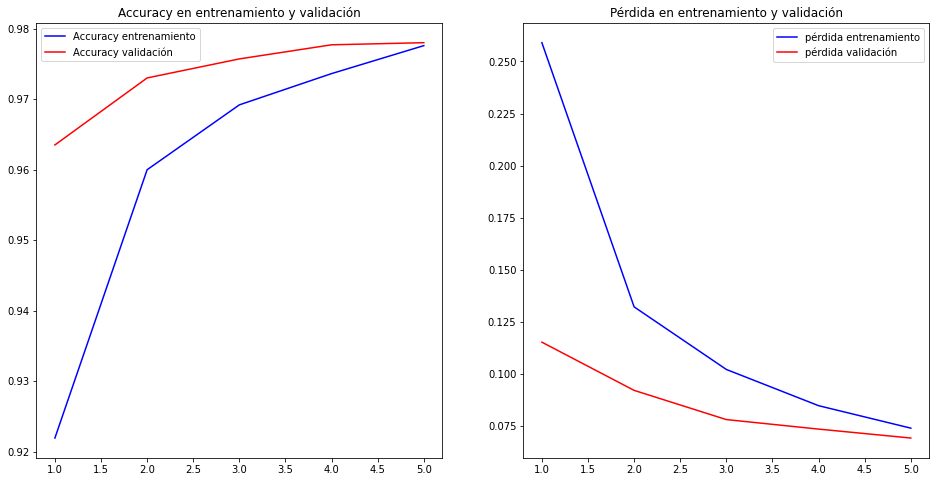

In [30]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA2=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA2.history['loss']
val_loss = historyA2.history['val_loss']
acc = historyA2.history['accuracy']
val_acc = historyA2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [31]:
print('pérdida en entrenamiento ', historyA2.history['loss'][-1])
print('pérdida en  test         ', historyA2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA2.history['accuracy'][-1])
print('accuracy en test         ', historyA2.history['val_accuracy'][-1])

pérdida en entrenamiento  0.07397297024726868
pérdida en  test          0.06922531127929688
accuracy en entrenamiento 0.9775833487510681
accuracy en test          0.9779999852180481


####2.2.3.3. Tasa de aprendizaje 0.5

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7264 - accuracy: 0.7758 - val_loss: 0.3134 - val_accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4230 - accuracy: 0.8759 - val_loss: 0.2372 - val_accuracy: 0.9346
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3595 - accuracy: 0.8931 - val_loss: 0.2126 - val_accuracy: 0.9453
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3211 - accuracy: 0.9046 - val_loss: 0.1964 - val_accuracy: 0.9483
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9513


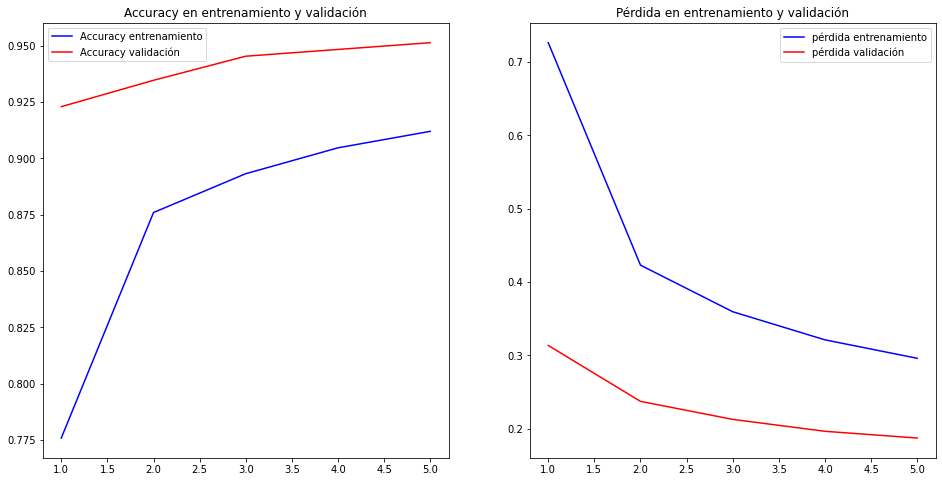

In [32]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA3=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA3.history['loss']
val_loss = historyA3.history['val_loss']
acc = historyA3.history['accuracy']
val_acc = historyA3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [33]:
print('pérdida en entrenamiento ', historyA3.history['loss'][-1])
print('pérdida en  test         ', historyA3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA3.history['accuracy'][-1])
print('accuracy en test         ', historyA3.history['val_accuracy'][-1])

pérdida en entrenamiento  0.29595521092414856
pérdida en  test          0.1871693730354309
accuracy en entrenamiento 0.9119499921798706
accuracy en test          0.9513000249862671


####2.2.3.4. Tasa de aprendizaje 0.9

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2654 - accuracy: 0.1491 - val_loss: 1.9921 - val_accuracy: 0.2204
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8897 - accuracy: 0.2800 - val_loss: 1.3928 - val_accuracy: 0.4453
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6020 - accuracy: 0.3885 - val_loss: 1.2672 - val_accuracy: 0.4932
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4759 - accuracy: 0.4496 - val_loss: 1.1522 - val_accuracy: 0.5743
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.1060 - accuracy: 0.5895


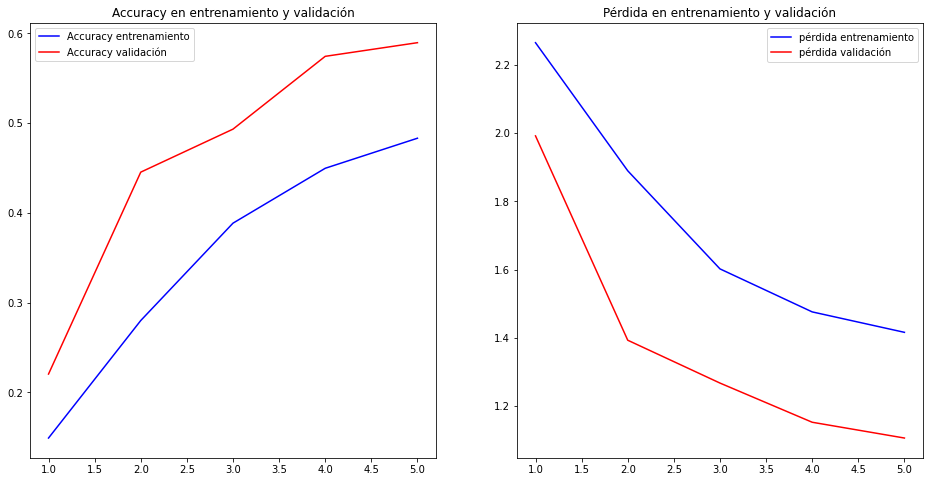

In [34]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA4=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA4.history['loss']
val_loss = historyA4.history['val_loss']
acc = historyA4.history['accuracy']
val_acc = historyA4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [35]:
print('pérdida en entrenamiento ', historyA4.history['loss'][-1])
print('pérdida en  test         ', historyA4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA4.history['accuracy'][-1])
print('accuracy en test         ', historyA4.history['val_accuracy'][-1])

pérdida en entrenamiento  1.4159491062164307
pérdida en  test          1.105957269668579
accuracy en entrenamiento 0.4830833375453949
accuracy en test          0.5895000100135803


####2.2.3.5. Tasa de aprendizaje 1.5

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4709 - accuracy: 0.1051 - val_loss: 2.3048 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3050 - accuracy: 0.1037 - val_loss: 2.3052 - val_accuracy: 0.1028
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3038 - accuracy: 0.1059 - val_loss: 2.3019 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3034 - accuracy: 0.1077 - val_loss: 2.3030 - val_accuracy: 0.1010
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 2.3020 - accuracy: 0.1135


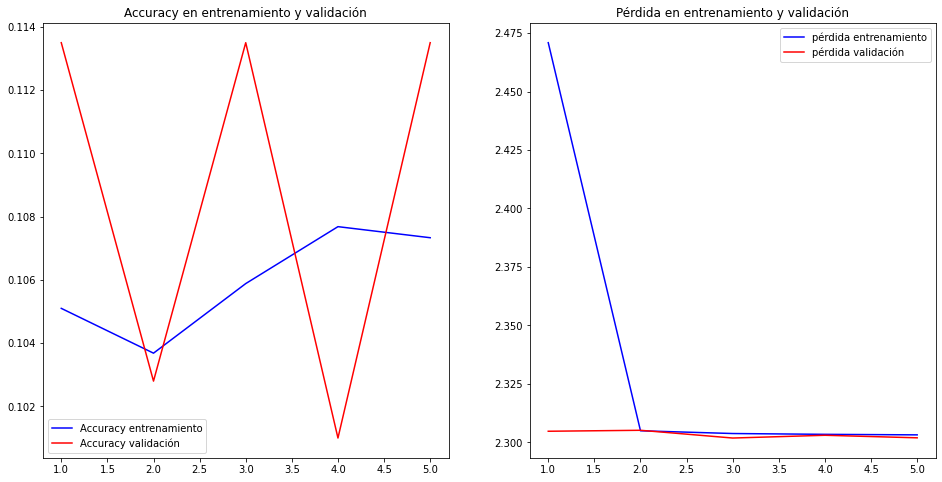

In [36]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA5=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA5.history['loss']
val_loss = historyA5.history['val_loss']
acc = historyA5.history['accuracy']
val_acc = historyA5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [37]:
print('pérdida en entrenamiento ', historyA5.history['loss'][-1])
print('pérdida en  test         ', historyA5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA5.history['accuracy'][-1])
print('accuracy en test         ', historyA5.history['val_accuracy'][-1])

pérdida en entrenamiento  2.303222179412842
pérdida en  test          2.3019585609436035
accuracy en entrenamiento 0.10733333230018616
accuracy en test          0.11349999904632568


Al tomar en cuenta los resultados del accuracy obtenida en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

###2.2.4.Adadelta 

Esta es una extensión de Adagrad que busca reducir su tasa de aprendizaje agresiva y decreciente. En lugar de acumular todos los gradientes cuadrados pasados, Adadelta restringe la ventana de gradientes pasados ​​acumulados a un tamaño fijo. En este optimizador no se necesita no se necesita establecer una tasa de aprendizaje predeterminada, ya que se ha eliminado de la regla de actualización.

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2570 - accuracy: 0.1363 - val_loss: 2.1548 - val_accuracy: 0.1942
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1055 - accuracy: 0.2352 - val_loss: 2.0120 - val_accuracy: 0.3341
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9725 - accuracy: 0.3525 - val_loss: 1.8817 - val_accuracy: 0.4845
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8513 - accuracy: 0.4554 - val_loss: 1.7600 - val_accuracy: 0.5787
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.6445 - accuracy: 0.6407
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5829 - accuracy: 0.8457 - val_loss: 0.3294 - val_accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3406 - accuracy: 0.9037 - val_loss: 0.2668 - val_accuracy: 0.9275
Epoch 3/5
1875/1875 [======================

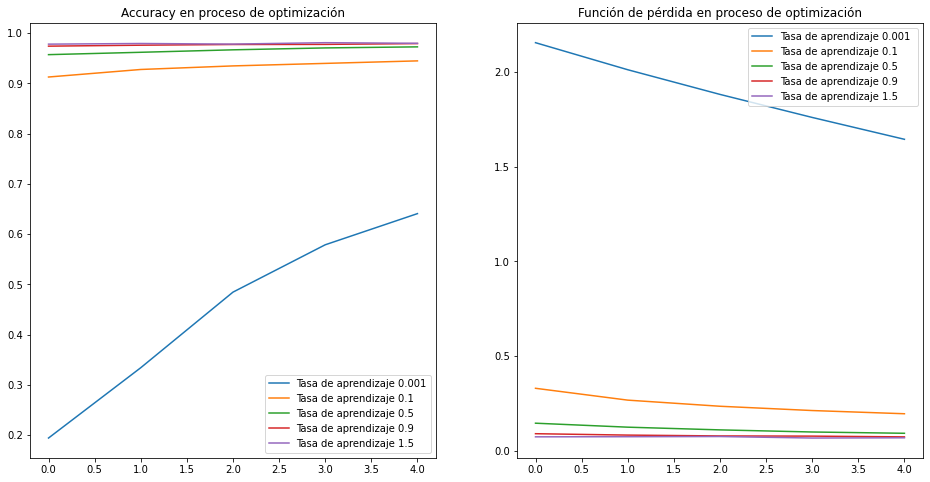

In [38]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adadelta(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyD=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyD.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyD.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.2.4.1. Tasa de aprendizaje 0.001

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3710 - accuracy: 0.1087 - val_loss: 2.2367 - val_accuracy: 0.1526
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1871 - accuracy: 0.1986 - val_loss: 2.0698 - val_accuracy: 0.3176
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0360 - accuracy: 0.3233 - val_loss: 1.9251 - val_accuracy: 0.4651
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9008 - accuracy: 0.4369 - val_loss: 1.7942 - val_accuracy: 0.5678
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 1.6736 - accuracy: 0.6341


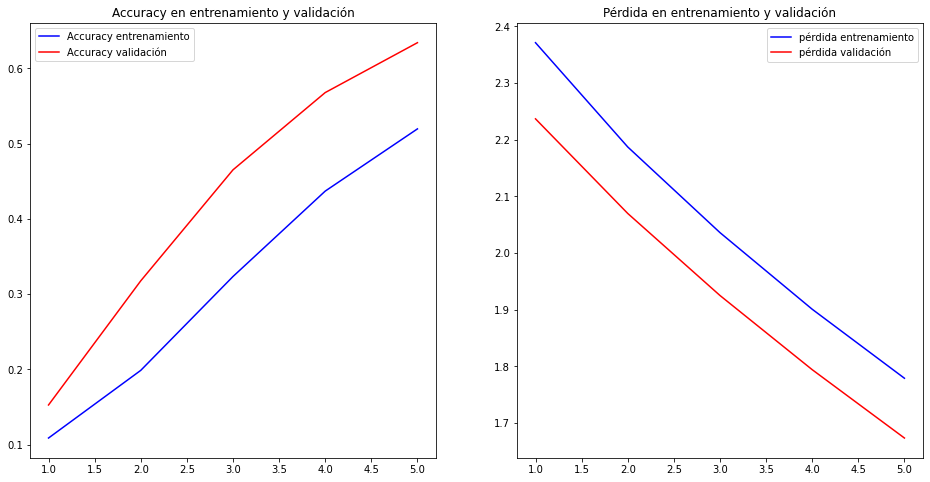

In [39]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD1=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD1.history['loss']
val_loss = historyD1.history['val_loss']
acc = historyD1.history['accuracy']
val_acc = historyD1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [40]:
print('pérdida en entrenamiento ', historyD1.history['loss'][-1])
print('pérdida en validación    ', historyD1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD1.history['accuracy'][-1])
print('accuracy en validación   ', historyD1.history['val_accuracy'][-1])

pérdida en entrenamiento  1.779085397720337
pérdida en validación     1.6736021041870117
accuracy en entrenamiento 0.5195500254631042
accuracy en validación    0.6341000199317932


####2.2.4.2. Tasa de aprendizaje 0.1

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6550 - accuracy: 0.8231 - val_loss: 0.3325 - val_accuracy: 0.9101
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3464 - accuracy: 0.9028 - val_loss: 0.2673 - val_accuracy: 0.9249
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9168 - val_loss: 0.2342 - val_accuracy: 0.9353
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9280 - val_loss: 0.2097 - val_accuracy: 0.9418
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1933 - accuracy: 0.9458


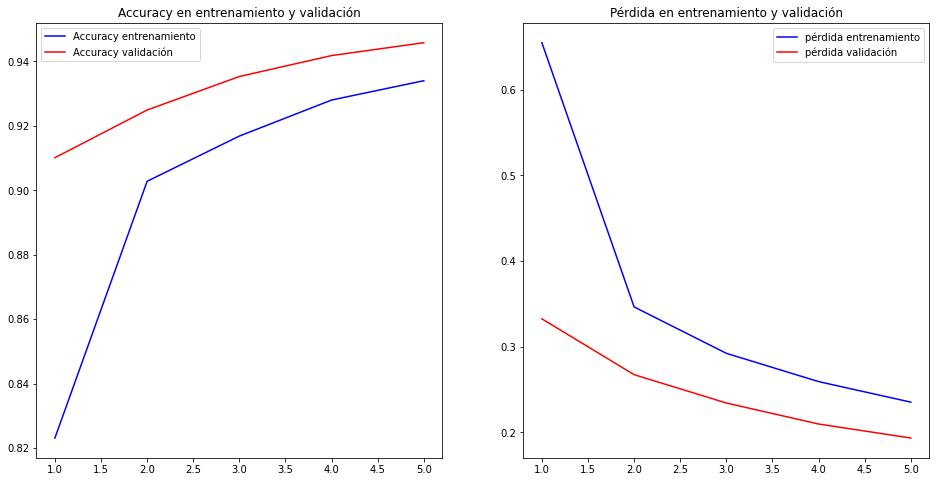

In [41]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD2=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD2.history['loss']
val_loss = historyD2.history['val_loss']
acc = historyD2.history['accuracy']
val_acc = historyD2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [42]:
print('pérdida en entrenamiento ', historyD2.history['loss'][-1])
print('pérdida en validación    ', historyD2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD2.history['accuracy'][-1])
print('accuracy en validación   ', historyD2.history['val_accuracy'][-1])

pérdida en entrenamiento  0.23524890840053558
pérdida en validación     0.19333231449127197
accuracy en entrenamiento 0.9340000152587891
accuracy en validación    0.9458000063896179


####2.2.4.3. Tasa de aprendizaje 0.5

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.8912 - val_loss: 0.2046 - val_accuracy: 0.9422
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2058 - accuracy: 0.9404 - val_loss: 0.1534 - val_accuracy: 0.9546
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1632 - accuracy: 0.9531 - val_loss: 0.1274 - val_accuracy: 0.9634
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1390 - accuracy: 0.9595 - val_loss: 0.1119 - val_accuracy: 0.9675
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1016 - accuracy: 0.9705


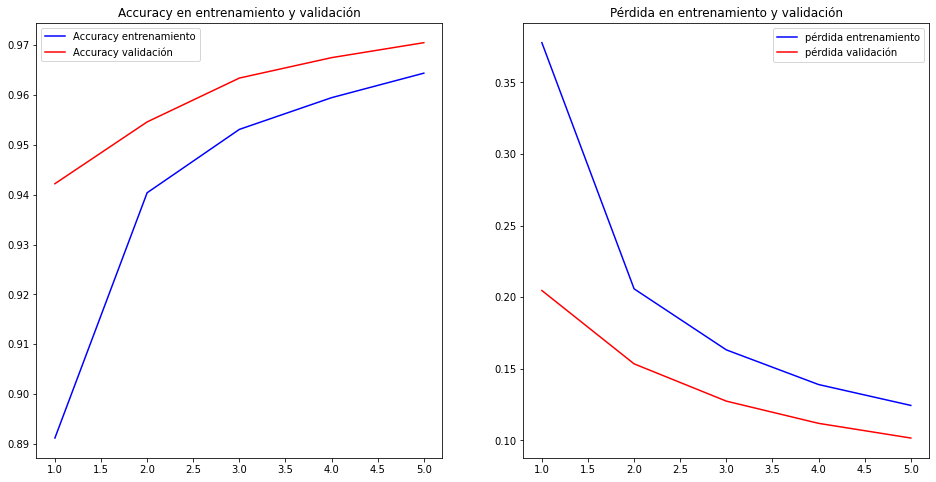

In [43]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD3=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD3.history['loss']
val_loss = historyD3.history['val_loss']
acc = historyD3.history['accuracy']
val_acc = historyD3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [44]:
print('pérdida en entrenamiento ', historyD3.history['loss'][-1])
print('pérdida en validación    ', historyD3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD3.history['accuracy'][-1])
print('accuracy en validación   ', historyD3.history['val_accuracy'][-1])

pérdida en entrenamiento  0.12441463768482208
pérdida en validación     0.10163730382919312
accuracy en entrenamiento 0.9643833041191101
accuracy en validación    0.9704999923706055


####2.2.4.4. Tasa de aprendizaje 0.9

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3166 - accuracy: 0.9086 - val_loss: 0.1671 - val_accuracy: 0.9514
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1662 - accuracy: 0.9513 - val_loss: 0.1194 - val_accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1296 - accuracy: 0.9624 - val_loss: 0.1030 - val_accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1120 - accuracy: 0.9668 - val_loss: 0.0919 - val_accuracy: 0.9720
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0870 - accuracy: 0.9736


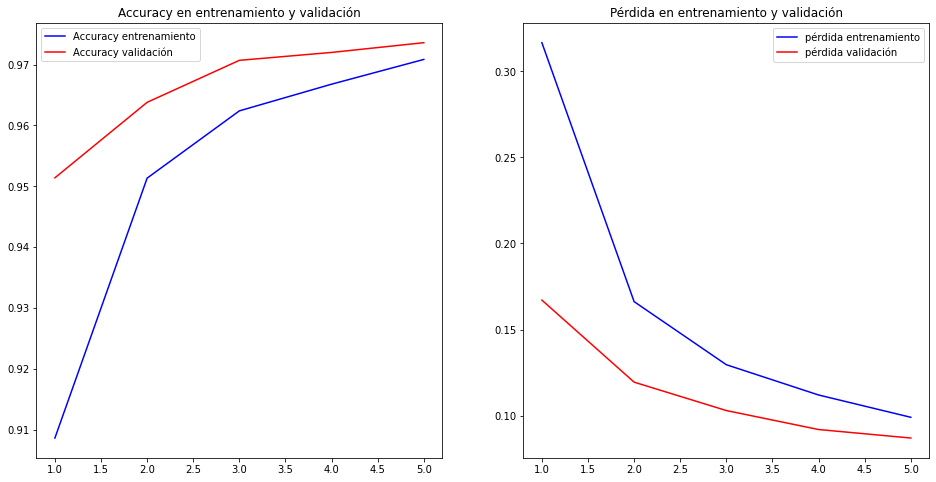

In [45]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD4=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD4.history['loss']
val_loss = historyD4.history['val_loss']
acc = historyD4.history['accuracy']
val_acc = historyD4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [46]:
print('pérdida en entrenamiento ', historyD4.history['loss'][-1])
print('pérdida en validación    ', historyD4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD4.history['accuracy'][-1])
print('accuracy en validación   ', historyD4.history['val_accuracy'][-1])

pérdida en entrenamiento  0.09903081506490707
pérdida en validación     0.08698851615190506
accuracy en entrenamiento 0.9708499908447266
accuracy en validación    0.9735999703407288


####2.2.4.5. Tasa de aprendizaje 1.5

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2766 - accuracy: 0.9183 - val_loss: 0.1404 - val_accuracy: 0.9580
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1464 - accuracy: 0.9571 - val_loss: 0.1069 - val_accuracy: 0.9687
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1140 - accuracy: 0.9659 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0994 - accuracy: 0.9707 - val_loss: 0.0805 - val_accuracy: 0.9752
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9744


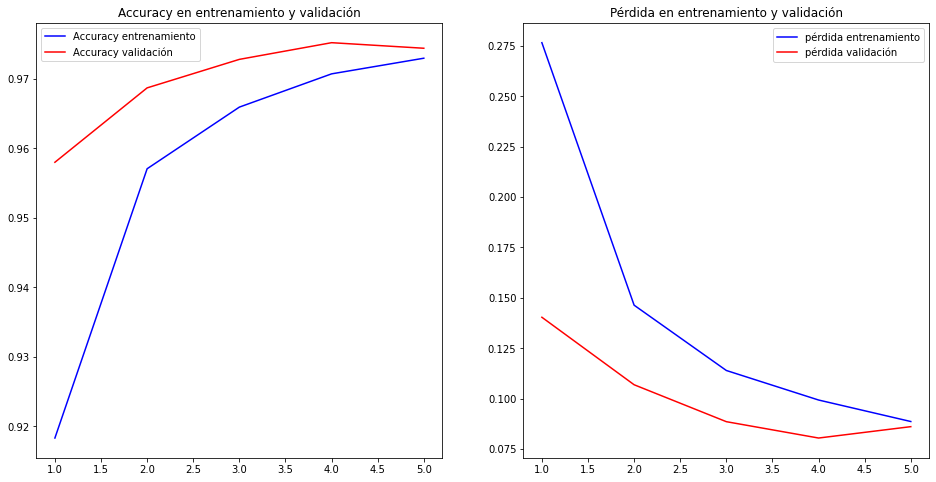

In [47]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD5=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD5.history['loss']
val_loss = historyD5.history['val_loss']
acc = historyD5.history['accuracy']
val_acc = historyD5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [48]:
print('pérdida en entrenamiento ', historyD5.history['loss'][-1])
print('pérdida en validación    ', historyD5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD5.history['accuracy'][-1])
print('accuracy en validación   ', historyD5.history['val_accuracy'][-1])

pérdida en entrenamiento  0.08868734538555145
pérdida en validación     0.08614051342010498
accuracy en entrenamiento 0.9729666709899902
accuracy en validación    0.974399983882904


Al tomar en cuenta los resultados del accuracy obtenido en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar, seguido de una tasa de aprendizaje con 0.5. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

##2.3. Reduzca el volumen de datos al 1% (600 datos).
Esto eleva la dificultad del problema al contar con menos datos. Repita la actividad del punto anterior. Considerando que el sobreentrenamiento es una diferencia importante en la métrica de desempeño obtenida en entrenamiento y validación responda las siguientes preguntas:

- ¿Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

- ¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?
    
- ¿Cuál fue el método que más rápido convergió?


A continuación se carga nuevamente el dataset, se tomarán 600 unidades en el grupo de entrenamiento y 100 en el de validación, tendiendo en cuenta la reducción planteada:

In [49]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train[0:600,:,:]
y_train=y_train[0:600]
x_test=x_test[0:100,:,:] 
y_test=y_test[0:100] 
x_train, x_test = x_train / 255.0, x_test / 255.0


In [50]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (600, 28, 28)
y_train: (600,)
x_test:  (100, 28, 28)
y_test:  (100,)


Validamos el balance de los datos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


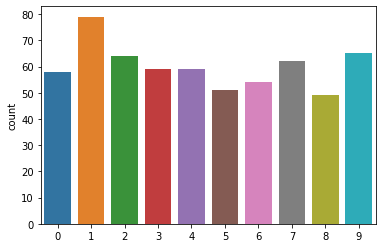

In [51]:
sns.countplot(y_train)

A continuación se cálcula el accuracy y la función de pérdida utilizado los optimizadores planteados en el punto 2.1

###2.3.1.Descenso de gradiente estocástico - SGD


A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 2.4310 - accuracy: 0.0867 - val_loss: 2.3850 - val_accuracy: 0.0600
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 2.4157 - accuracy: 0.0967 - val_loss: 2.3630 - val_accuracy: 0.0600
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.3820 - accuracy: 0.1017 - val_loss: 2.3427 - val_accuracy: 0.0600
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 2.3567 - accuracy: 0.1083 - val_loss: 2.3228 - val_accuracy: 0.0700
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 2.3036 - accuracy: 0.1100
Epoch 1/5
19/19 [==============================] - 0s 11ms/step - loss: 1.7093 - accuracy: 0.4983 - val_loss: 1.2543 - val_accuracy: 0.7000
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 0.9430 - accuracy: 0.7617 - val_loss: 0.8636 - val_accuracy: 0.7600
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss

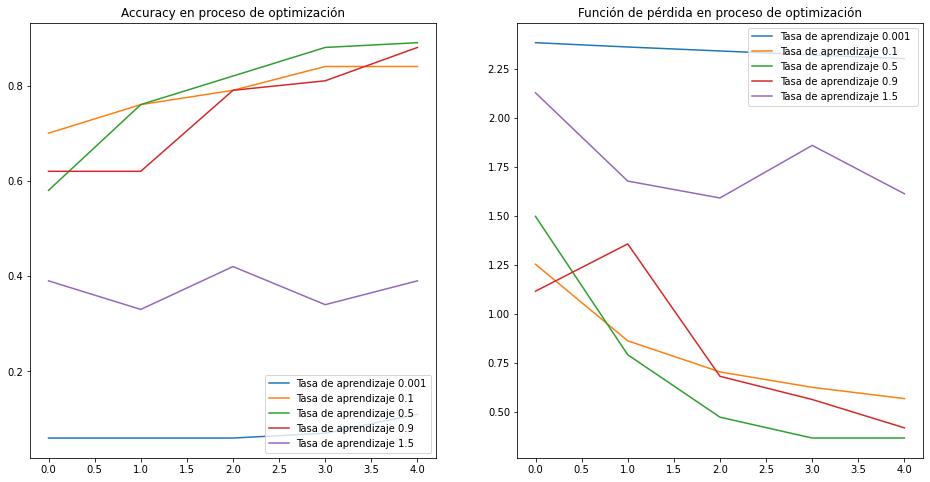

In [52]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.SGD(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historySR=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historySR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historySR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.3.1.1. Tasa de aprendizaje 0.001

Epoch 1/5
19/19 [==============================] - 0s 11ms/step - loss: 2.3608 - accuracy: 0.0783 - val_loss: 2.3286 - val_accuracy: 0.0900
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.3226 - accuracy: 0.0917 - val_loss: 2.3038 - val_accuracy: 0.0900
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.3009 - accuracy: 0.1117 - val_loss: 2.2808 - val_accuracy: 0.1100
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 2.2632 - accuracy: 0.1283 - val_loss: 2.2585 - val_accuracy: 0.1400
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 2.2370 - accuracy: 0.1600


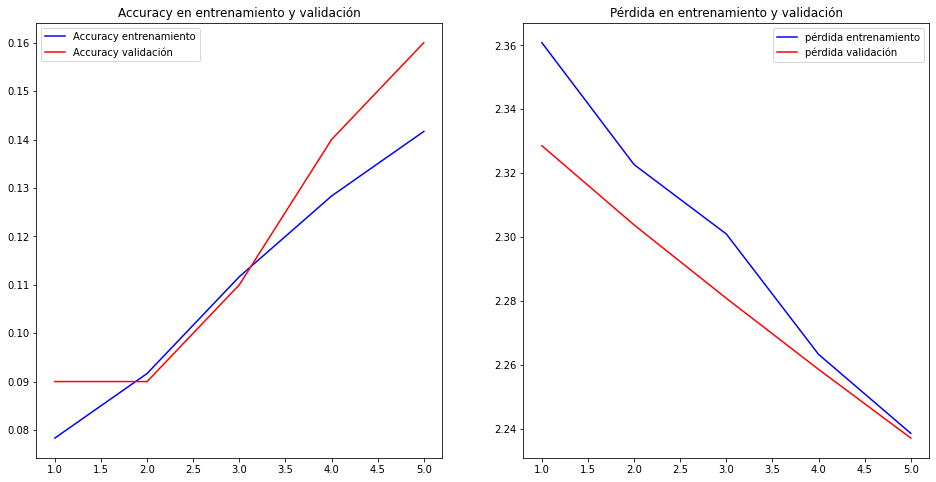

In [53]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS1R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS1R.history['loss']
val_loss = historyS1R.history['val_loss']
acc = historyS1R.history['accuracy']
val_acc = historyS1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [54]:
print('pérdida en entrenamiento ', historyS1R.history['loss'][-1])
print('pérdida en  test         ', historyS1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS1R.history['accuracy'][-1])
print('accuracy en test         ', historyS1R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.2385079860687256
pérdida en  test          2.23704195022583
accuracy en entrenamiento 0.14166666567325592
accuracy en test          0.1599999964237213


####2.3.1.2. Tasa de aprendizaje 0.1

Epoch 1/5
19/19 [==============================] - 0s 11ms/step - loss: 1.8479 - accuracy: 0.4467 - val_loss: 1.3869 - val_accuracy: 0.7000
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.0006 - accuracy: 0.7533 - val_loss: 0.9378 - val_accuracy: 0.7700
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.8383 - val_loss: 0.7381 - val_accuracy: 0.7500
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.5627 - accuracy: 0.8550 - val_loss: 0.6368 - val_accuracy: 0.8400
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.5957 - accuracy: 0.8200


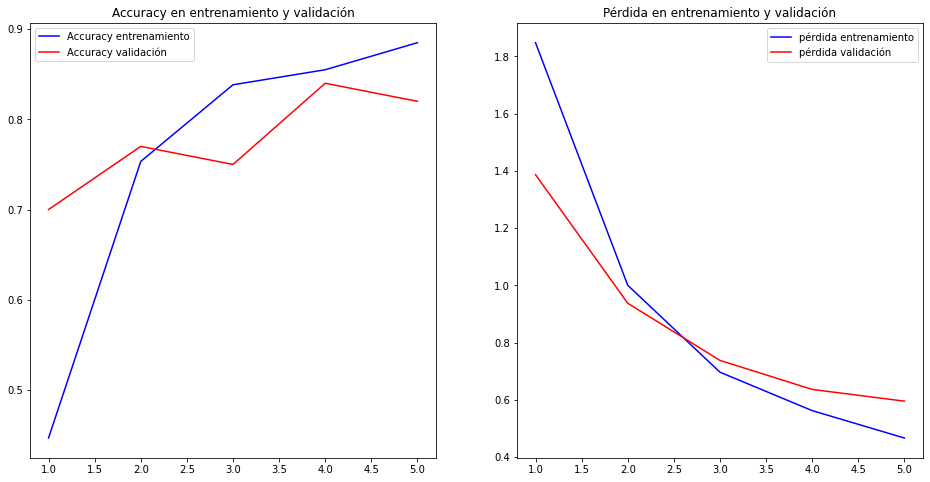

In [55]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS2R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS2R.history['loss']
val_loss = historyS2R.history['val_loss']
acc = historyS2R.history['accuracy']
val_acc = historyS2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [56]:
print('pérdida en entrenamiento ', historyS2R.history['loss'][-1])
print('pérdida en  test         ', historyS2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS2R.history['accuracy'][-1])
print('accuracy en test         ', historyS2R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.4669555127620697
pérdida en  test          0.5957396626472473
accuracy en entrenamiento 0.8849999904632568
accuracy en test          0.8199999928474426


####2.3.1.3. Tasa de aprendizaje 0.5

Epoch 1/5
19/19 [==============================] - 0s 11ms/step - loss: 1.5658 - accuracy: 0.4600 - val_loss: 0.8368 - val_accuracy: 0.7500
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.8017 - val_loss: 0.6965 - val_accuracy: 0.7400
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.4197 - accuracy: 0.8550 - val_loss: 0.5950 - val_accuracy: 0.7300
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.2865 - accuracy: 0.9133 - val_loss: 0.4637 - val_accuracy: 0.8200
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.8400


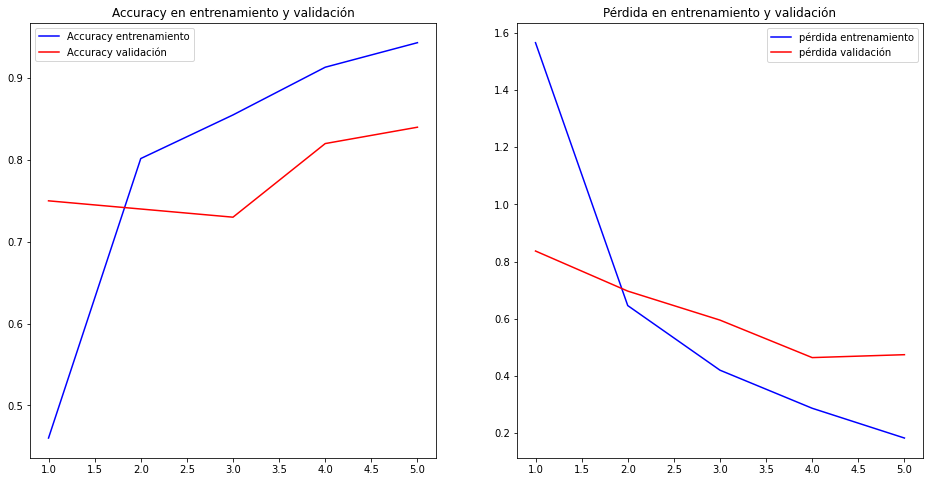

In [57]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS3R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS3R.history['loss']
val_loss = historyS3R.history['val_loss']
acc = historyS3R.history['accuracy']
val_acc = historyS3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [58]:
print('pérdida en entrenamiento ', historyS3R.history['loss'][-1])
print('pérdida en  test         ', historyS3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS3R.history['accuracy'][-1])
print('accuracy en test         ', historyS3R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.18227572739124298
pérdida en  test          0.47394314408302307
accuracy en entrenamiento 0.9433333277702332
accuracy en test          0.8399999737739563


####2.3.1.4. Tasa de aprendizaje 0.9

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 2.2764 - accuracy: 0.3450 - val_loss: 1.6318 - val_accuracy: 0.5400
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.1581 - accuracy: 0.6117 - val_loss: 1.9344 - val_accuracy: 0.4900
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.8747 - accuracy: 0.7183 - val_loss: 0.8561 - val_accuracy: 0.6900
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.6118 - accuracy: 0.8083 - val_loss: 0.5010 - val_accuracy: 0.8100
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8800


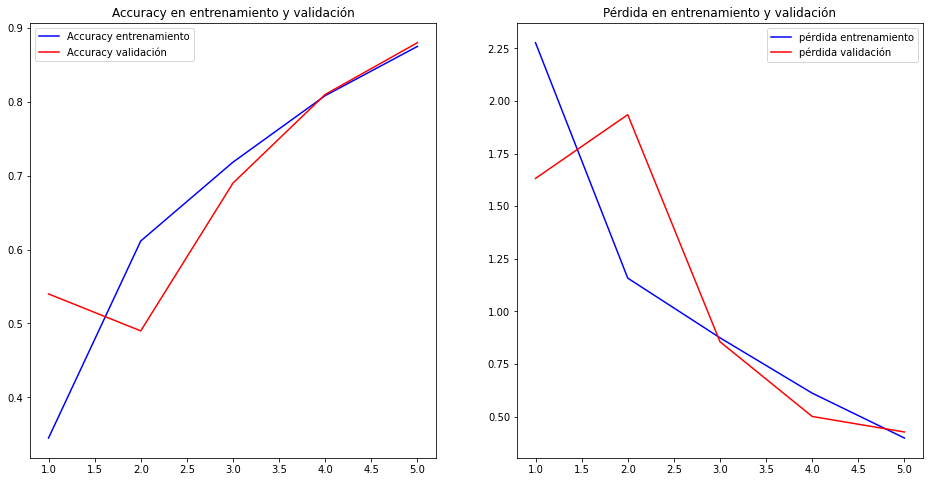

In [59]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS4R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS4R.history['loss']
val_loss = historyS4R.history['val_loss']
acc = historyS4R.history['accuracy']
val_acc = historyS4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [60]:
print('pérdida en entrenamiento ', historyS4R.history['loss'][-1])
print('pérdida en  test         ', historyS4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS4R.history['accuracy'][-1])
print('accuracy en test         ', historyS4R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.39860376715660095
pérdida en  test          0.4273068308830261
accuracy en entrenamiento 0.875
accuracy en test          0.8799999952316284


####2.3.1.5. Tasa de aprendizaje 1.5

Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 3.8156 - accuracy: 0.2317 - val_loss: 2.2768 - val_accuracy: 0.2000
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 2.0491 - accuracy: 0.2650 - val_loss: 1.9226 - val_accuracy: 0.3200
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 1.9956 - accuracy: 0.2667 - val_loss: 1.9194 - val_accuracy: 0.3000
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 1.9567 - accuracy: 0.2350 - val_loss: 1.8864 - val_accuracy: 0.3200
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 1.5491 - accuracy: 0.4100


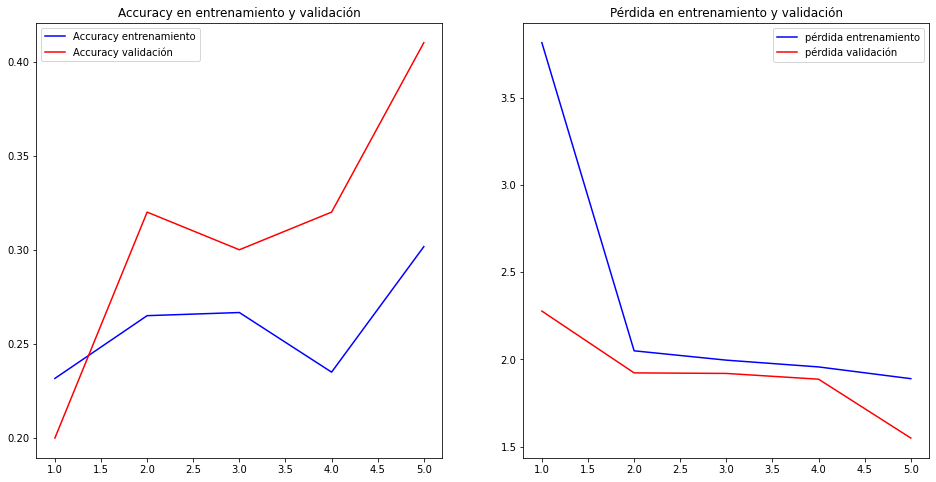

In [61]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS5R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS5R.history['loss']
val_loss = historyS5R.history['val_loss']
acc = historyS5R.history['accuracy']
val_acc = historyS5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [62]:
print('pérdida en entrenamiento ', historyS5R.history['loss'][-1])
print('pérdida en validación    ', historyS5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS5R.history['accuracy'][-1])
print('accuracy en validación   ', historyS5R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.889420747756958
pérdida en validación     1.5490788221359253
accuracy en entrenamiento 0.3016666769981384
accuracy en validación    0.4099999964237213


####Comparación optimizador SGD total vs dataset reducido

In [63]:
print('0.001', 'accuracy en entrenamiento Total', historyS1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyS1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyS2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyS2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyS3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyS3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyS4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyS4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyS5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyS5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.8424500226974487 accuracy en entrenamiento Total 0.14166666567325592
0.001 accuracy en validación Total   0.8828999996185303 accuracy en validación reduc   0.1599999964237213
0.1 accuracy en entrenamiento Total 0.9699666500091553 accuracy en entrenamiento Total 0.8849999904632568
0.1 accuracy en validación Total   0.9736999869346619 accuracy en validación reduc   0.8199999928474426
0.5 accuracy en entrenamiento Total 0.9669833183288574 accuracy en entrenamiento Total 0.9433333277702332
0.5 accuracy en validación Total   0.9710000157356262 accuracy en validación reduc   0.8399999737739563
0.9 accuracy en entrenamiento Total 0.9298833608627319 accuracy en entrenamiento Total 0.875
0.9 accuracy en validación Total   0.9503999948501587 accuracy en validación reduc   0.8799999952316284
1.5 accuracy en entrenamiento Total 0.3223833441734314 accuracy en entrenamiento Total 0.3016666769981384
1.5 accuracy en validación Total   0.3747999966144562 accuracy

###2.3.2. RMSprop

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 1.5068 - accuracy: 0.5883 - val_loss: 1.0848 - val_accuracy: 0.7200
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.7763 - accuracy: 0.8283 - val_loss: 0.7664 - val_accuracy: 0.7600
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.8667 - val_loss: 0.6066 - val_accuracy: 0.8300
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.4153 - accuracy: 0.9017 - val_loss: 0.5522 - val_accuracy: 0.8500
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.5040 - accuracy: 0.8300
Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 51.4750 - accuracy: 0.4333 - val_loss: 3.7767 - val_accuracy: 0.3700
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.7868 - accuracy: 0.6000 - val_loss: 1.1431 - val_accuracy: 0.6200
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - los

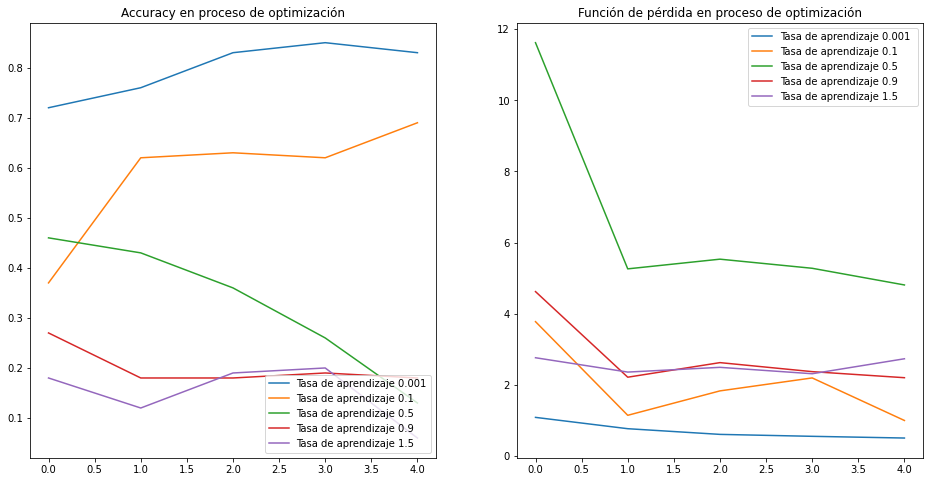

In [64]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.RMSprop(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyRR=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyRR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyRR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')


De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.3.2.1. Tasa de aprendizaje 0.001

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 1.5026 - accuracy: 0.5683 - val_loss: 1.0747 - val_accuracy: 0.7000
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.7692 - accuracy: 0.8200 - val_loss: 0.7853 - val_accuracy: 0.7700
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 0.5437 - accuracy: 0.8700 - val_loss: 0.6359 - val_accuracy: 0.8100
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8900 - val_loss: 0.5652 - val_accuracy: 0.8200
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.8700


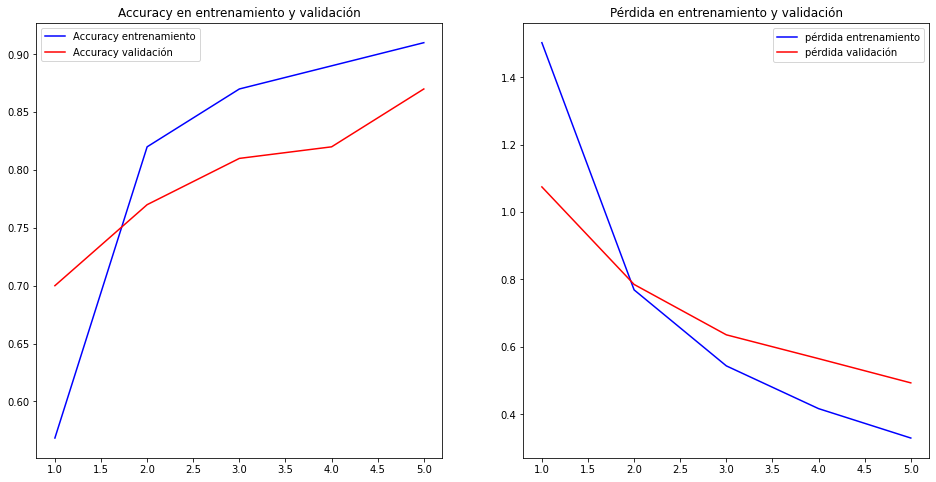

In [65]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR1R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR1R.history['loss']
val_loss = historyR1R.history['val_loss']
acc = historyR1R.history['accuracy']
val_acc = historyR1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [66]:
print('pérdida en entrenamiento ', historyR1R.history['loss'][-1])
print('pérdida en validación    ', historyR1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR1R.history['accuracy'][-1])
print('accuracy en validación   ', historyR1R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.3296605348587036
pérdida en validación     0.49331024289131165
accuracy en entrenamiento 0.9100000262260437
accuracy en validación    0.8700000047683716


####2.3.2.2. Tasa de aprendizaje 0.1

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 31.7129 - accuracy: 0.4383 - val_loss: 1.4902 - val_accuracy: 0.6500
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 1.1232 - accuracy: 0.6850 - val_loss: 1.3308 - val_accuracy: 0.6900
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.1151 - accuracy: 0.6583 - val_loss: 1.6148 - val_accuracy: 0.7400
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 1.1055 - accuracy: 0.7133 - val_loss: 1.8622 - val_accuracy: 0.6800
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 1.6128 - accuracy: 0.7000


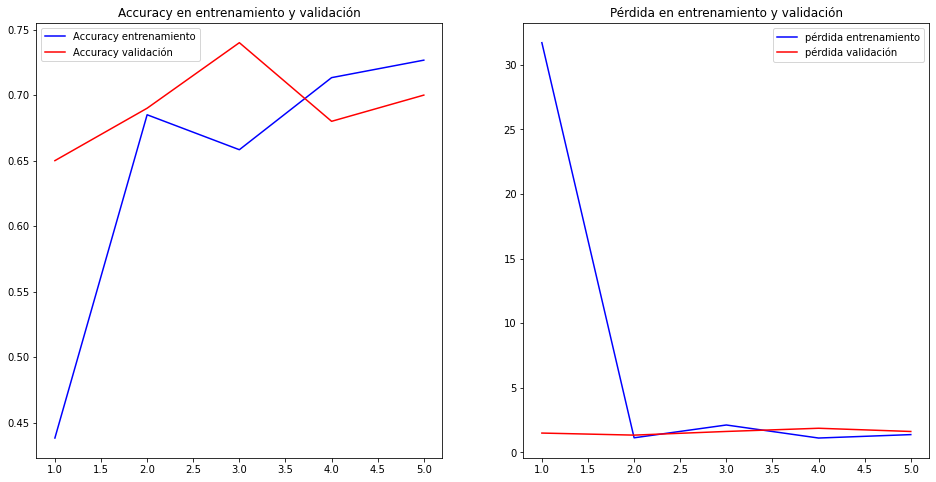

In [67]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR2R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR2R.history['loss']
val_loss = historyR2R.history['val_loss']
acc = historyR2R.history['accuracy']
val_acc = historyR2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [68]:
print('pérdida en entrenamiento ', historyR2R.history['loss'][-1])
print('pérdida en validación    ', historyR2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR2R.history['accuracy'][-1])
print('accuracy en validación   ', historyR2R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.3706940412521362
pérdida en validación     1.6127519607543945
accuracy en entrenamiento 0.7266666889190674
accuracy en validación    0.699999988079071


####2.3.2.3. Tasa de aprendizaje 0.5

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 1138.2998 - accuracy: 0.3050 - val_loss: 5.9666 - val_accuracy: 0.3600
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 5.8626 - accuracy: 0.3867 - val_loss: 2.5534 - val_accuracy: 0.3400
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.7561 - accuracy: 0.4000 - val_loss: 3.5972 - val_accuracy: 0.2800
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 3.3424 - accuracy: 0.3183 - val_loss: 2.3639 - val_accuracy: 0.3000
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 16.1276 - accuracy: 0.3400


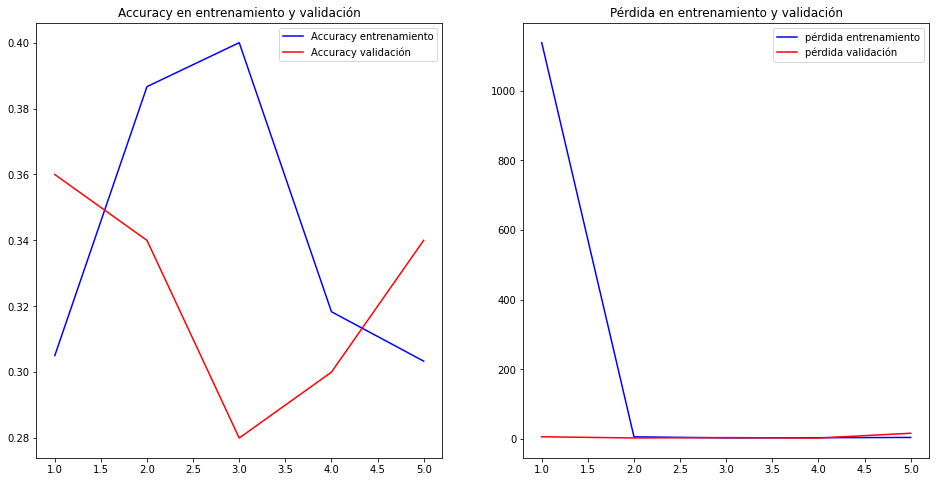

In [69]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR3R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR3R.history['loss']
val_loss = historyR3R.history['val_loss']
acc = historyR3R.history['accuracy']
val_acc = historyR3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [70]:
print('pérdida en entrenamiento ', historyR3R.history['loss'][-1])
print('pérdida en validación    ', historyR3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR3R.history['accuracy'][-1])
print('accuracy en validación   ', historyR3R.history['val_accuracy'][-1])

pérdida en entrenamiento  4.023987293243408
pérdida en validación     16.127559661865234
accuracy en entrenamiento 0.3033333420753479
accuracy en validación    0.3400000035762787


####2.3.2.4. Tasa de aprendizaje 0.9

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 2353.6555 - accuracy: 0.4217 - val_loss: 19.1179 - val_accuracy: 0.5500
Epoch 2/5
19/19 [==============================] - 0s 6ms/step - loss: 11.7935 - accuracy: 0.5633 - val_loss: 7.6567 - val_accuracy: 0.4300
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 4.2537 - accuracy: 0.5017 - val_loss: 13.5138 - val_accuracy: 0.4200
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 3.8401 - accuracy: 0.4667 - val_loss: 3.7601 - val_accuracy: 0.4000
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 10.9964 - accuracy: 0.3500


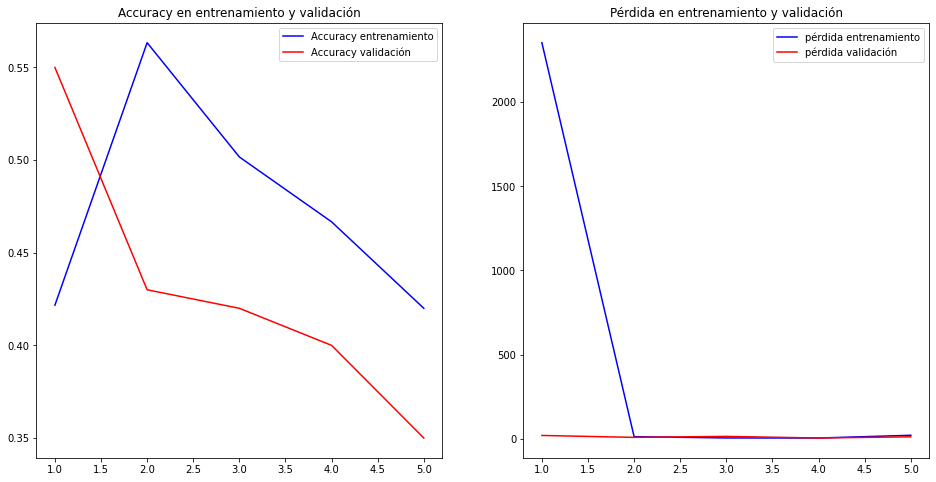

In [71]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR4R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR4R.history['loss']
val_loss = historyR4R.history['val_loss']
acc = historyR4R.history['accuracy']
val_acc = historyR4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [72]:
print('pérdida en entrenamiento ', historyR4R.history['loss'][-1])
print('pérdida en validación    ', historyR4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR4R.history['accuracy'][-1])
print('accuracy en validación   ', historyR4R.history['val_accuracy'][-1])

pérdida en entrenamiento  20.213428497314453
pérdida en validación     10.996443748474121
accuracy en entrenamiento 0.41999998688697815
accuracy en validación    0.3499999940395355


####2.3.2.5. Tasa de aprendizaje 1.5

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 5684.8628 - accuracy: 0.4383 - val_loss: 103.3977 - val_accuracy: 0.5800
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 49.7964 - accuracy: 0.5900 - val_loss: 10.1650 - val_accuracy: 0.5100
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 9.6084 - accuracy: 0.5433 - val_loss: 5.6863 - val_accuracy: 0.4400
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 15.9660 - accuracy: 0.4883 - val_loss: 6.7360 - val_accuracy: 0.3900
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 2.1012 - accuracy: 0.4500


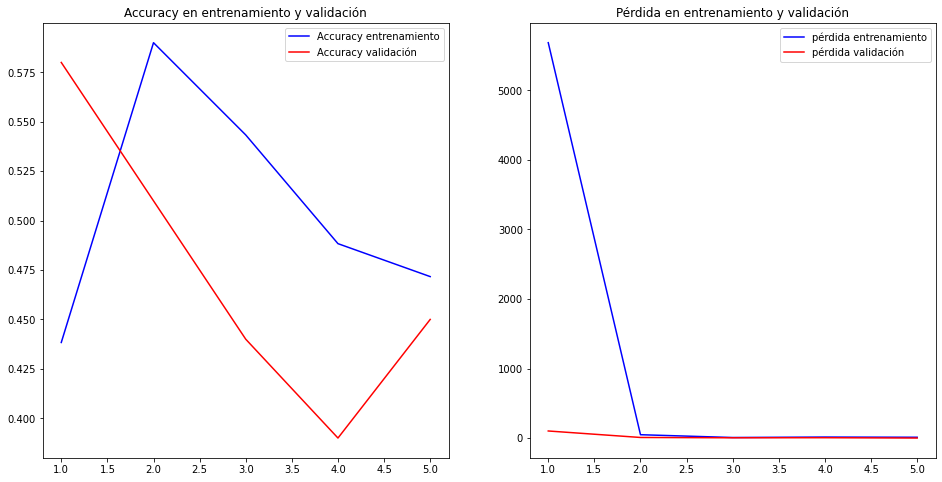

In [73]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyR5R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR5R.history['loss']
val_loss = historyR5R.history['val_loss']
acc = historyR5R.history['accuracy']
val_acc = historyR5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [74]:
print('pérdida en entrenamiento ', historyR5R.history['loss'][-1])
print('pérdida en validación    ', historyR5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR5R.history['accuracy'][-1])
print('accuracy en validación   ', historyR5R.history['val_accuracy'][-1])

pérdida en entrenamiento  13.204472541809082
pérdida en validación     2.1012394428253174
accuracy en entrenamiento 0.4716666638851166
accuracy en validación    0.44999998807907104


####Comparación optimizador RSMpro total vs dataset reducido

In [75]:
print('0.001', 'accuracy en entrenamiento Total', historyR1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyR1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyR2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyR2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyR3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyR3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyR4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyR4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyR5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyR5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.971916675567627 accuracy en entrenamiento Total 0.9100000262260437
0.001 accuracy en validación Total   0.9753999710083008 accuracy en validación reduc   0.8700000047683716
0.1 accuracy en entrenamiento Total 0.6853166818618774 accuracy en entrenamiento Total 0.7266666889190674
0.1 accuracy en validación Total   0.7745000123977661 accuracy en validación reduc   0.699999988079071
0.5 accuracy en entrenamiento Total 0.25255000591278076 accuracy en entrenamiento Total 0.3033333420753479
0.5 accuracy en validación Total   0.2824000120162964 accuracy en validación reduc   0.3400000035762787
0.9 accuracy en entrenamiento Total 0.18493333458900452 accuracy en entrenamiento Total 0.41999998688697815
0.9 accuracy en validación Total   0.2282000035047531 accuracy en validación reduc   0.3499999940395355
1.5 accuracy en entrenamiento Total 0.1372833400964737 accuracy en entrenamiento Total 0.4716666638851166
1.5 accuracy en validación Total   0.163699999451

###2.3.3.AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo):



Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 2.4139 - accuracy: 0.1083 - val_loss: 2.3465 - val_accuracy: 0.0700
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.3408 - accuracy: 0.1300 - val_loss: 2.2806 - val_accuracy: 0.1400
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 2.2634 - accuracy: 0.1533 - val_loss: 2.2233 - val_accuracy: 0.1900
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 2.2077 - accuracy: 0.2133 - val_loss: 2.1737 - val_accuracy: 0.2400
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 2.1268 - accuracy: 0.3100
Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 1.2693 - accuracy: 0.6100 - val_loss: 0.9727 - val_accuracy: 0.6900
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 0.5946 - accuracy: 0.8333 - val_loss: 0.5615 - val_accuracy: 0.8400
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss

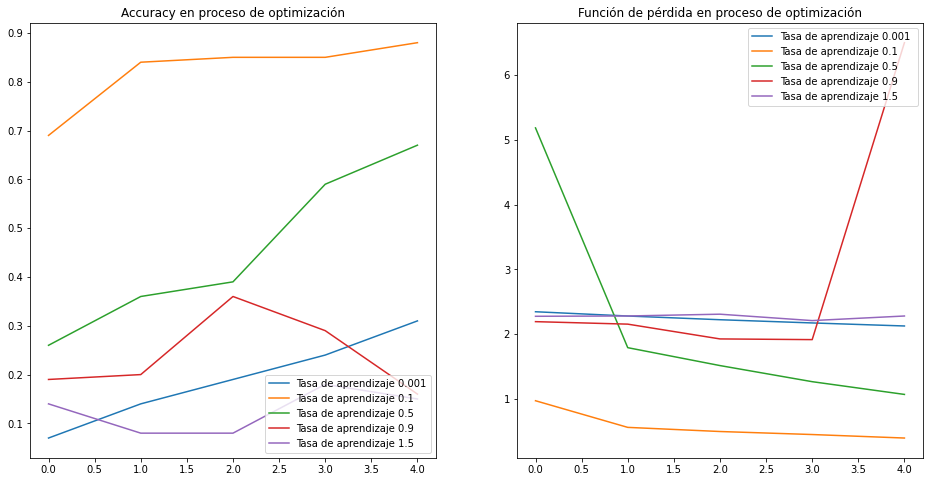

In [76]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adagrad(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyAR=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyAR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyAR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados se observa un mejor accuracy y por lo tanto, función de pérdida con una tasa de aprendizaje de 0.1. Mientras que los peores comportamientos respecto al accuracy de evaluación se obtuvieron con una tasa de aprendizaje 0.001 y 1.5, correspondientes al menor y mayor valor, lo cual se debe a que cuando se utiliza una tasa de aprendizaje menor el aprendizaje lleva más tiempo mientrás que con un valor mayor el punto rebotará al azar eternamente en la parte inferior con lo cual se excederá el valor mínimo.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.3.3.1. Tasa de aprendizaje 0.001

Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 2.3499 - accuracy: 0.1267 - val_loss: 2.2821 - val_accuracy: 0.1100
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.2549 - accuracy: 0.1533 - val_loss: 2.2249 - val_accuracy: 0.1500
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 2.1993 - accuracy: 0.1783 - val_loss: 2.1743 - val_accuracy: 0.1800
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 2.1522 - accuracy: 0.2200 - val_loss: 2.1268 - val_accuracy: 0.3200
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 2.0827 - accuracy: 0.3700


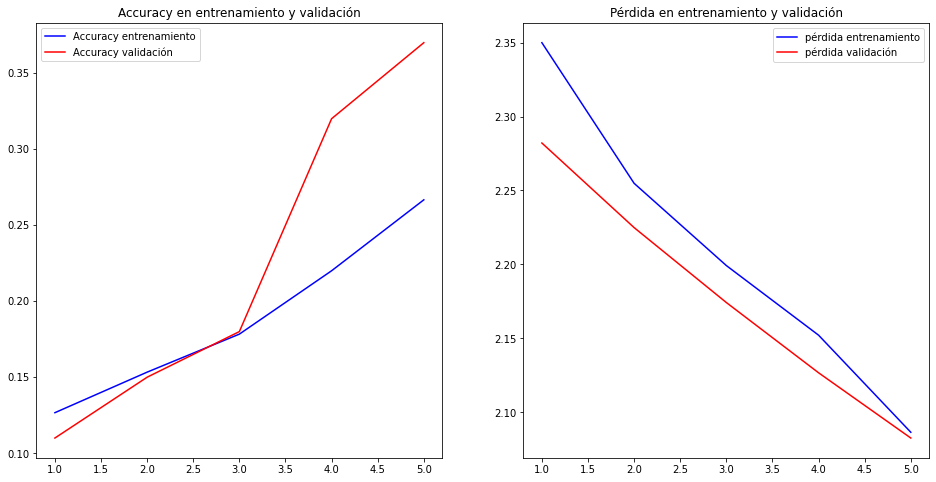

In [77]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA1R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA1R.history['loss']
val_loss = historyA1R.history['val_loss']
acc = historyA1R.history['accuracy']
val_acc = historyA1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [78]:
print('pérdida en entrenamiento ', historyA1R.history['loss'][-1])
print('pérdida en  test         ', historyA1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA1R.history['accuracy'][-1])
print('accuracy en test         ', historyA1R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.0866429805755615
pérdida en  test          2.0827443599700928
accuracy en entrenamiento 0.2666666805744171
accuracy en test          0.3700000047683716


####2.3.3.2. Tasa de aprendizaje 0.1

Epoch 1/5
19/19 [==============================] - 0s 11ms/step - loss: 1.4074 - accuracy: 0.5450 - val_loss: 0.8149 - val_accuracy: 0.7300
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.5678 - accuracy: 0.8317 - val_loss: 0.7188 - val_accuracy: 0.7900
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 0.3897 - accuracy: 0.8817 - val_loss: 0.4714 - val_accuracy: 0.8500
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.2830 - accuracy: 0.9217 - val_loss: 0.4877 - val_accuracy: 0.8600
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.4400 - accuracy: 0.8600


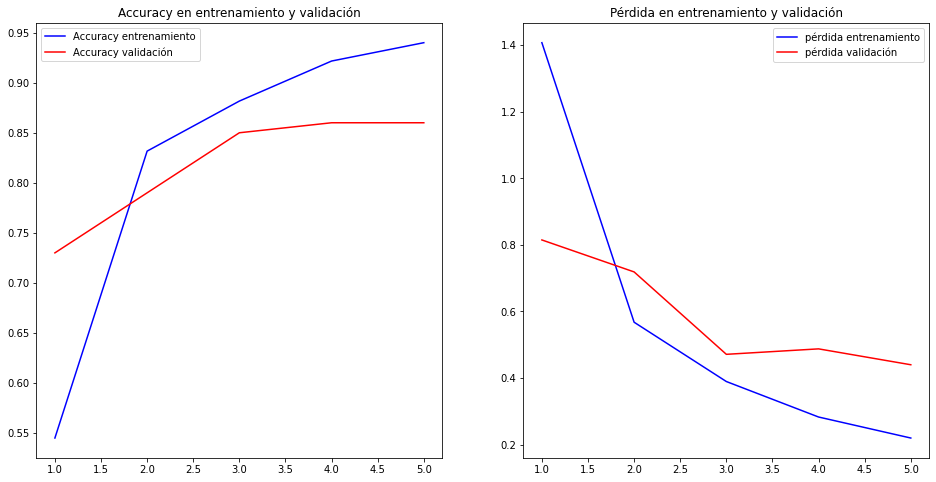

In [79]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA2R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA2R.history['loss']
val_loss = historyA2R.history['val_loss']
acc = historyA2R.history['accuracy']
val_acc = historyA2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [80]:
print('pérdida en entrenamiento ', historyA2R.history['loss'][-1])
print('pérdida en  test         ', historyA2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA2R.history['accuracy'][-1])
print('accuracy en test         ', historyA2R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.2199264019727707
pérdida en  test          0.4400298297405243
accuracy en entrenamiento 0.9399999976158142
accuracy en test          0.8600000143051147


####2.3.3.3. Tasa de aprendizaje 0.5

Epoch 1/5
19/19 [==============================] - 1s 46ms/step - loss: 3.3663 - accuracy: 0.2333 - val_loss: 1.9696 - val_accuracy: 0.2600
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.8948 - accuracy: 0.3117 - val_loss: 1.5884 - val_accuracy: 0.4100
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 1.4612 - accuracy: 0.4967 - val_loss: 1.3449 - val_accuracy: 0.4200
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 1.3714 - accuracy: 0.5067 - val_loss: 1.0322 - val_accuracy: 0.6300
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.8040 - accuracy: 0.7100


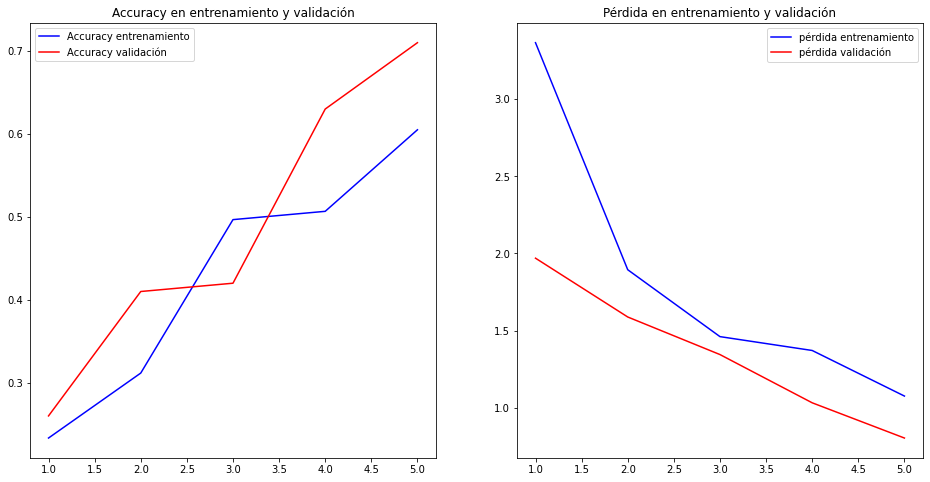

In [81]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA3R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA3R.history['loss']
val_loss = historyA3R.history['val_loss']
acc = historyA3R.history['accuracy']
val_acc = historyA3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [82]:
print('pérdida en entrenamiento ', historyA3R.history['loss'][-1])
print('pérdida en  test         ', historyA3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA3R.history['accuracy'][-1])
print('accuracy en test         ', historyA3R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.0759917497634888
pérdida en  test          0.8039523959159851
accuracy en entrenamiento 0.6050000190734863
accuracy en test          0.7099999785423279


####2.3.3.4. Tasa de aprendizaje 0.9

Epoch 1/5
19/19 [==============================] - 1s 14ms/step - loss: 6.3724 - accuracy: 0.1150 - val_loss: 2.2797 - val_accuracy: 0.1300
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 2.3606 - accuracy: 0.1650 - val_loss: 2.1680 - val_accuracy: 0.2200
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.3217 - accuracy: 0.1233 - val_loss: 2.8531 - val_accuracy: 0.1400
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 2.4057 - accuracy: 0.1133 - val_loss: 2.2794 - val_accuracy: 0.1400
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 2.2862 - accuracy: 0.0800


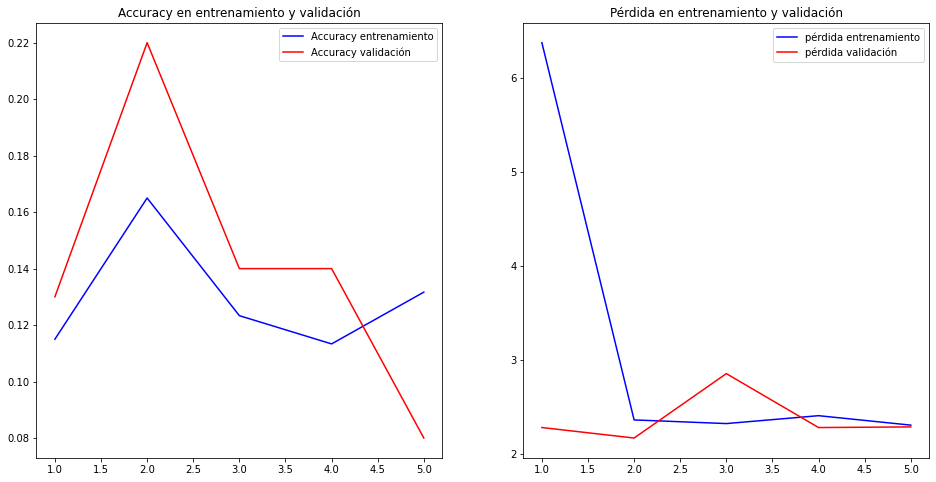

In [83]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA4R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA4R.history['loss']
val_loss = historyA4R.history['val_loss']
acc = historyA4R.history['accuracy']
val_acc = historyA4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [84]:
print('pérdida en entrenamiento ', historyA4R.history['loss'][-1])
print('pérdida en  test         ', historyA4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA4R.history['accuracy'][-1])
print('accuracy en test         ', historyA4R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.3051626682281494
pérdida en  test          2.2861666679382324
accuracy en entrenamiento 0.1316666603088379
accuracy en test          0.07999999821186066


####2.3.3.5. Tasa de aprendizaje 1.5

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 13.4798 - accuracy: 0.1583 - val_loss: 2.2039 - val_accuracy: 0.2000
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.4103 - accuracy: 0.1850 - val_loss: 2.0545 - val_accuracy: 0.2500
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.0730 - accuracy: 0.1983 - val_loss: 1.9570 - val_accuracy: 0.2700
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 2.1165 - accuracy: 0.1967 - val_loss: 1.8202 - val_accuracy: 0.2700
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 1.9373 - accuracy: 0.2400


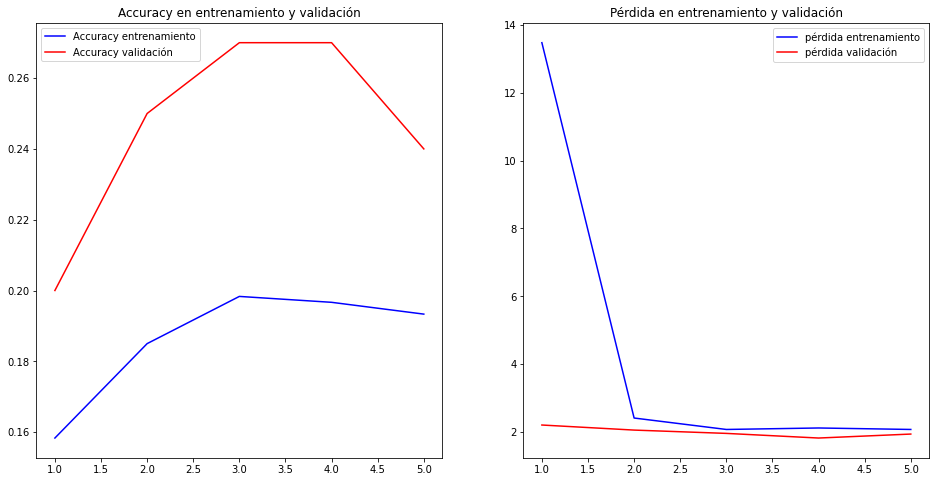

In [85]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA5R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA5R.history['loss']
val_loss = historyA5R.history['val_loss']
acc = historyA5R.history['accuracy']
val_acc = historyA5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [86]:
print('pérdida en entrenamiento ', historyA5R.history['loss'][-1])
print('pérdida en  test         ', historyA5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA5R.history['accuracy'][-1])
print('accuracy en test         ', historyA5R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.073171854019165
pérdida en  test          1.937300443649292
accuracy en entrenamiento 0.19333332777023315
accuracy en test          0.23999999463558197


####Comparación optimizador AdaGrad total vs dataset reducido

In [87]:
print('0.001', 'accuracy en entrenamiento Total', historyA1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyA1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyA2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyA2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyA3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyA3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyA4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyA4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyA5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyA5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.8656666874885559 accuracy en entrenamiento Total 0.2666666805744171
0.001 accuracy en validación Total   0.8970000147819519 accuracy en validación reduc   0.3700000047683716
0.1 accuracy en entrenamiento Total 0.9775833487510681 accuracy en entrenamiento Total 0.9399999976158142
0.1 accuracy en validación Total   0.9779999852180481 accuracy en validación reduc   0.8600000143051147
0.5 accuracy en entrenamiento Total 0.9119499921798706 accuracy en entrenamiento Total 0.6050000190734863
0.5 accuracy en validación Total   0.9513000249862671 accuracy en validación reduc   0.7099999785423279
0.9 accuracy en entrenamiento Total 0.4830833375453949 accuracy en entrenamiento Total 0.1316666603088379
0.9 accuracy en validación Total   0.5895000100135803 accuracy en validación reduc   0.07999999821186066
1.5 accuracy en entrenamiento Total 0.10733333230018616 accuracy en entrenamiento Total 0.19333332777023315
1.5 accuracy en validación Total   0.1134999990

###2.3.4.Adadelta 

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/5
19/19 [==============================] - 1s 13ms/step - loss: 2.3975 - accuracy: 0.0617 - val_loss: 2.3598 - val_accuracy: 0.0500
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 2.3862 - accuracy: 0.0517 - val_loss: 2.3580 - val_accuracy: 0.0500
Epoch 3/5
19/19 [==============================] - 0s 5ms/step - loss: 2.3892 - accuracy: 0.0717 - val_loss: 2.3562 - val_accuracy: 0.0500
Epoch 4/5
19/19 [==============================] - 0s 6ms/step - loss: 2.3949 - accuracy: 0.0583 - val_loss: 2.3545 - val_accuracy: 0.0500
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 2.3527 - accuracy: 0.0500
Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 2.3027 - accuracy: 0.1100 - val_loss: 2.1801 - val_accuracy: 0.2000
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 2.0794 - accuracy: 0.3217 - val_loss: 2.0262 - val_accuracy: 0.4000
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss

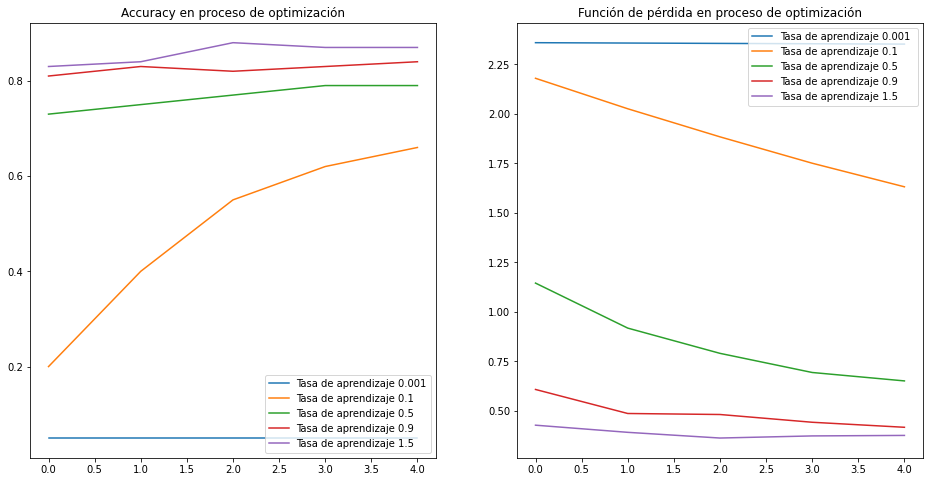

In [88]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adadelta(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyDR=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyDR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyDR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.3.4.1. Tasa de aprendizaje 0.001

Epoch 1/5
19/19 [==============================] - 1s 12ms/step - loss: 2.4866 - accuracy: 0.0883 - val_loss: 2.4770 - val_accuracy: 0.0900
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 2.4776 - accuracy: 0.0783 - val_loss: 2.4747 - val_accuracy: 0.0900
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 2.4743 - accuracy: 0.0767 - val_loss: 2.4725 - val_accuracy: 0.0900
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 2.4593 - accuracy: 0.0917 - val_loss: 2.4703 - val_accuracy: 0.0800
Epoch 5/5
4/4 [==============================] - 0s 5ms/step - loss: 2.4681 - accuracy: 0.0900


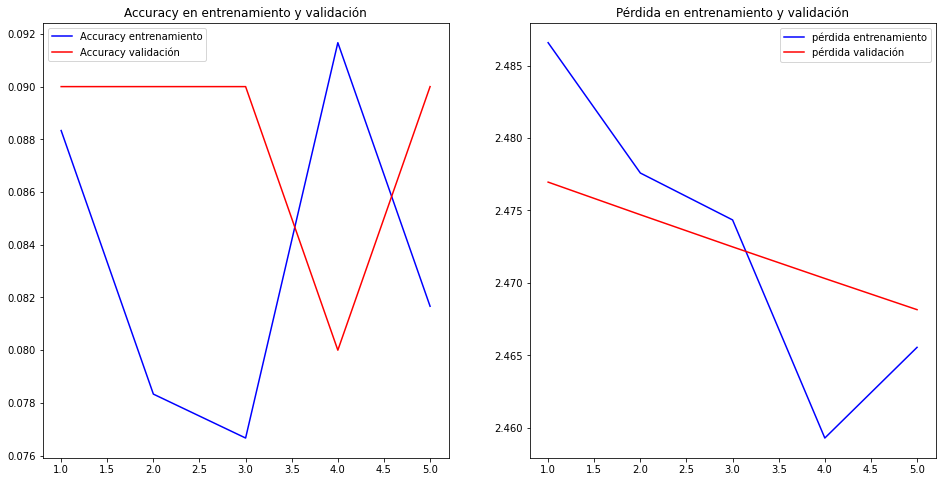

In [89]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD1R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD1R.history['loss']
val_loss = historyD1R.history['val_loss']
acc = historyD1R.history['accuracy']
val_acc = historyD1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [90]:
print('pérdida en entrenamiento ', historyD1R.history['loss'][-1])
print('pérdida en validación    ', historyD1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD1R.history['accuracy'][-1])
print('accuracy en validación   ', historyD1R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.465546131134033
pérdida en validación     2.4681484699249268
accuracy en entrenamiento 0.08166666328907013
accuracy en validación    0.09000000357627869


####2.3.4.2. Tasa de aprendizaje 0.1

Epoch 1/5
19/19 [==============================] - 1s 13ms/step - loss: 2.3448 - accuracy: 0.1233 - val_loss: 2.2074 - val_accuracy: 0.1500
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 2.1400 - accuracy: 0.2683 - val_loss: 2.0423 - val_accuracy: 0.3500
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 1.9344 - accuracy: 0.4317 - val_loss: 1.8827 - val_accuracy: 0.5300
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 1.7768 - accuracy: 0.5583 - val_loss: 1.7378 - val_accuracy: 0.6500
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 1.6134 - accuracy: 0.6600


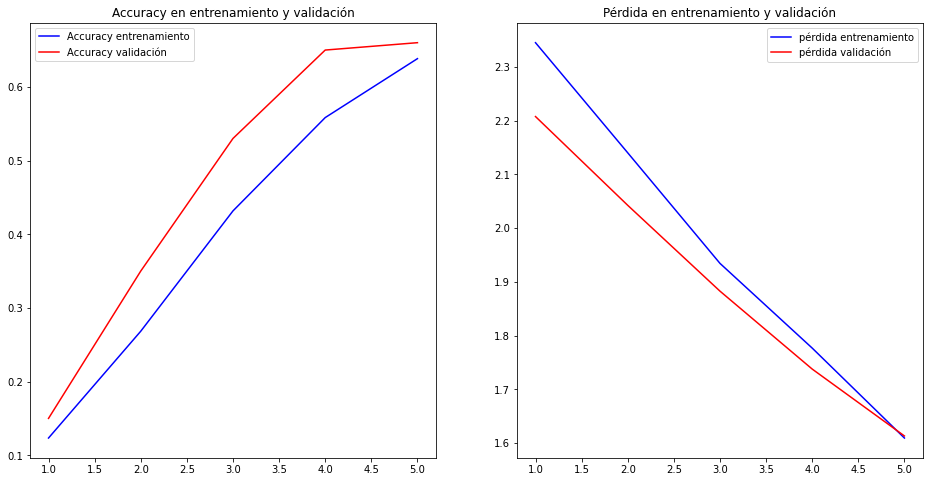

In [91]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD2R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD2R.history['loss']
val_loss = historyD2R.history['val_loss']
acc = historyD2R.history['accuracy']
val_acc = historyD2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [92]:
print('pérdida en entrenamiento ', historyD2R.history['loss'][-1])
print('pérdida en validación    ', historyD2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD2R.history['accuracy'][-1])
print('accuracy en validación   ', historyD2R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.6095361709594727
pérdida en validación     1.613389015197754
accuracy en entrenamiento 0.6383333206176758
accuracy en validación    0.6600000262260437


####2.3.4.3. Tasa de aprendizaje 0.5

Epoch 1/5
19/19 [==============================] - 1s 13ms/step - loss: 1.9915 - accuracy: 0.3767 - val_loss: 1.6205 - val_accuracy: 0.6600
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 1.3058 - accuracy: 0.7183 - val_loss: 1.1815 - val_accuracy: 0.7100
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.9199 - accuracy: 0.8000 - val_loss: 0.9357 - val_accuracy: 0.7900
Epoch 4/5
19/19 [==============================] - 0s 4ms/step - loss: 0.7105 - accuracy: 0.8467 - val_loss: 0.7953 - val_accuracy: 0.7800
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 0.7136 - accuracy: 0.7800


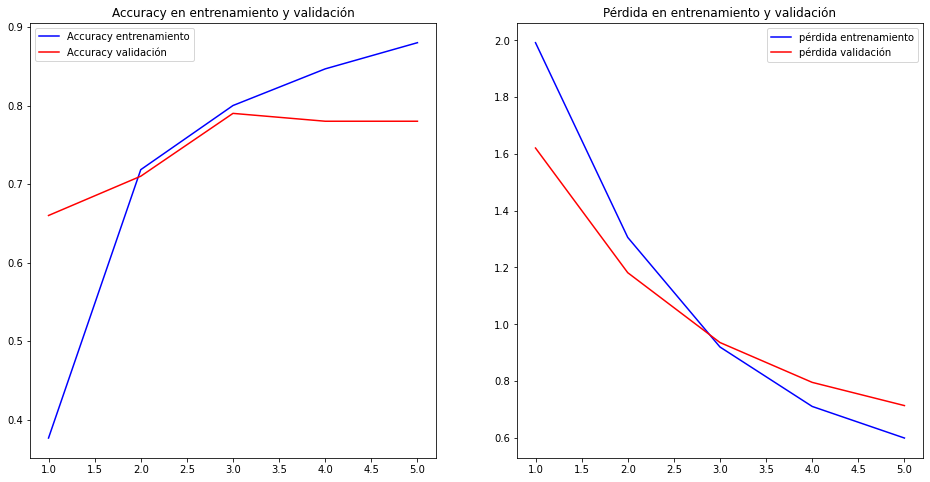

In [93]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD3R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD3R.history['loss']
val_loss = historyD3R.history['val_loss']
acc = historyD3R.history['accuracy']
val_acc = historyD3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [94]:
print('pérdida en entrenamiento ', historyD3R.history['loss'][-1])
print('pérdida en validación    ', historyD3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD3R.history['accuracy'][-1])
print('accuracy en validación   ', historyD3R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.5993068218231201
pérdida en validación     0.7135673761367798
accuracy en entrenamiento 0.8799999952316284
accuracy en validación    0.7799999713897705


####2.3.4.4. Tasa de aprendizaje 0.9

Epoch 1/5
19/19 [==============================] - 1s 14ms/step - loss: 1.7510 - accuracy: 0.4767 - val_loss: 1.2433 - val_accuracy: 0.6800
Epoch 2/5
19/19 [==============================] - 0s 5ms/step - loss: 0.9192 - accuracy: 0.7800 - val_loss: 0.9605 - val_accuracy: 0.7100
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.8417 - val_loss: 0.7145 - val_accuracy: 0.7800
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.5063 - accuracy: 0.8600 - val_loss: 0.6385 - val_accuracy: 0.8100
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.5751 - accuracy: 0.8400


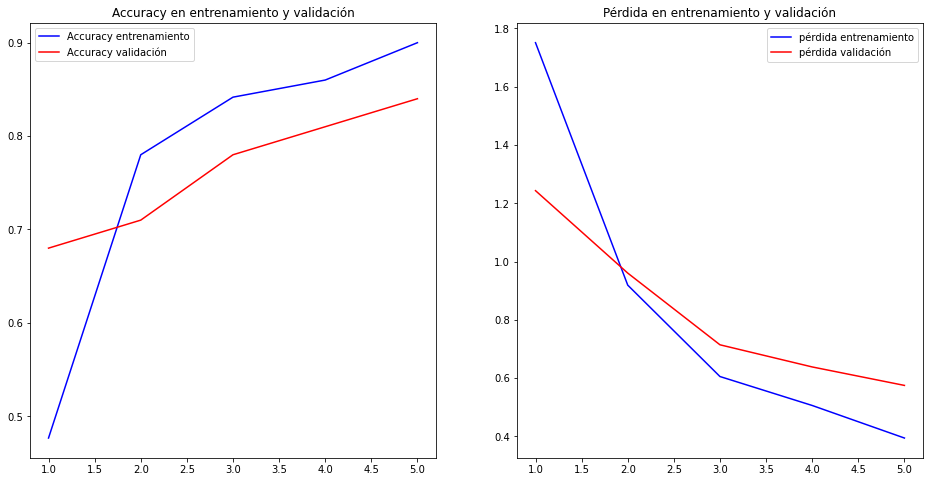

In [95]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD4R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD4R.history['loss']
val_loss = historyD4R.history['val_loss']
acc = historyD4R.history['accuracy']
val_acc = historyD4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [96]:
print('pérdida en entrenamiento ', historyD4R.history['loss'][-1])
print('pérdida en validación    ', historyD4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD4R.history['accuracy'][-1])
print('accuracy en validación   ', historyD4R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.39456069469451904
pérdida en validación     0.575110673904419
accuracy en entrenamiento 0.8999999761581421
accuracy en validación    0.8399999737739563


####2.3.4.5. Tasa de aprendizaje 1.5

Epoch 1/5
19/19 [==============================] - 1s 11ms/step - loss: 1.5105 - accuracy: 0.5633 - val_loss: 1.0510 - val_accuracy: 0.7600
Epoch 2/5
19/19 [==============================] - 0s 4ms/step - loss: 0.6602 - accuracy: 0.8167 - val_loss: 0.7547 - val_accuracy: 0.7600
Epoch 3/5
19/19 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8983 - val_loss: 0.5227 - val_accuracy: 0.8600
Epoch 4/5
19/19 [==============================] - 0s 5ms/step - loss: 0.3473 - accuracy: 0.9117 - val_loss: 0.4994 - val_accuracy: 0.8600
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8200


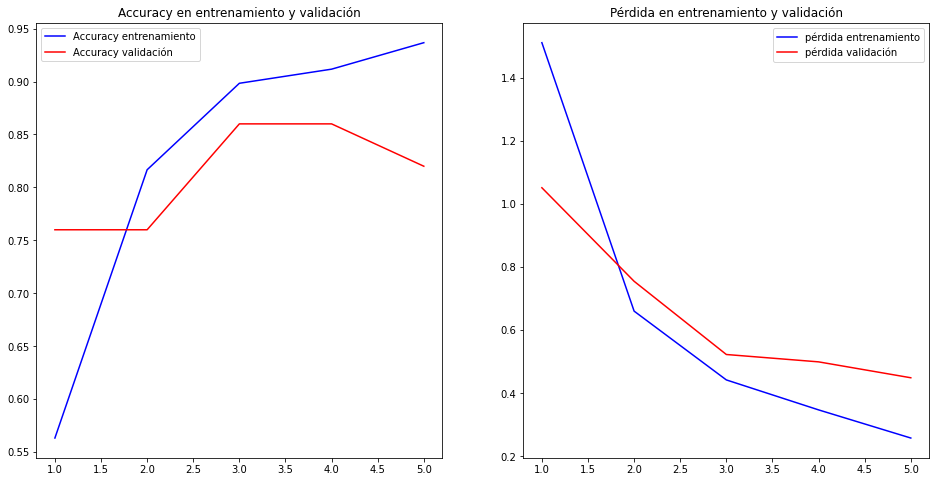

In [97]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD5R=model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD5R.history['loss']
val_loss = historyD5R.history['val_loss']
acc = historyD5R.history['accuracy']
val_acc = historyD5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [98]:
print('pérdida en entrenamiento ', historyD5R.history['loss'][-1])
print('pérdida en validación    ', historyD5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD5R.history['accuracy'][-1])
print('accuracy en validación   ', historyD5R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.25812259316444397
pérdida en validación     0.44904935359954834
accuracy en entrenamiento 0.9366666674613953
accuracy en validación    0.8199999928474426


####Comparación optimizador Adadelta total vs dataset reducido

In [99]:
print('0.001', 'accuracy en entrenamiento Total', historyD1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyD1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyD2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyD2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyD3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyD3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyD4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyD4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyD5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyD5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.5195500254631042 accuracy en entrenamiento Total 0.08166666328907013
0.001 accuracy en validación Total   0.6341000199317932 accuracy en validación reduc   0.09000000357627869
0.1 accuracy en entrenamiento Total 0.9340000152587891 accuracy en entrenamiento Total 0.6383333206176758
0.1 accuracy en validación Total   0.9458000063896179 accuracy en validación reduc   0.6600000262260437
0.5 accuracy en entrenamiento Total 0.9643833041191101 accuracy en entrenamiento Total 0.8799999952316284
0.5 accuracy en validación Total   0.9704999923706055 accuracy en validación reduc   0.7799999713897705
0.9 accuracy en entrenamiento Total 0.9708499908447266 accuracy en entrenamiento Total 0.8999999761581421
0.9 accuracy en validación Total   0.9735999703407288 accuracy en validación reduc   0.8399999737739563
1.5 accuracy en entrenamiento Total 0.9729666709899902 accuracy en entrenamiento Total 0.9366666674613953
1.5 accuracy en validación Total   0.97439998388

Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?

¿Cuál fue el método que más rápido convergió?


https://www.ellaberintodefalken.com/2019/10/clasificacion-deep-learning-keras.html

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

https://programmerclick.com/article/2432913113/